In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from keras.preprocessing.image import load_img,img_to_array
import time,sched

Using TensorFlow backend.


In [2]:
filename = 'video.avi'
frame_rate = 24.0
model_name = "face_recog.h5"
train_dir = "train_photos"
test_dir ="test_photos"
VIDEO_TYPE={
    'avi': cv2.VideoWriter_fourcc(*'XVID'),
    'mp4': cv2.VideoWriter_fourcc(*'XVID'),
}

In [3]:
def change_res(cap,width,height):
    cap.set(3,width)
    cap.set(4,height)

def get_dims(cap):
    width,height = (640,480)	#480p only :: can declare various resolutions
    change_res(cap,width,height)
    return (width,height)

def get_video_type(filename):
    filename, ext = os.path.splitext(filename)
    if ext in VIDEO_TYPE:
        return VIDEO_TYPE[ext]
    return VIDEO_TYPE['avi']

In [4]:
recordVideo= True
#Capture the video
def CaptureVideo():
    cap = cv2.VideoCapture(0)
    dims = get_dims(cap)
    video_type_cv2 = get_video_type(filename)

    out = cv2.VideoWriter(filename,video_type_cv2,frame_rate,dims)
    while True:
        #Capture framy by frame
        ret,frame = cap.read()
        out.write(frame)
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) &0xFF==ord('x'):
            break

    cap.release()
    out.release()
    cv2.destroyAllWindows()

#Changing the videos into frames
def GetFramesFromVideo(filename):
    vidObj = cv2.VideoCapture(filename)

    count=0
    success =1
    while(success):
        success,image = vidObj.read()

        cv2.imwrite("images\\initials\\new_frame%d.jpg" %(count),image)
        count+=1

In [206]:
CaptureVideo()

In [207]:
GetFramesFromVideo(filename)

error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [9]:
def extract_face_from_file(filename):
    pixels = pyplot.imread(filename)

    detector = MTCNN()
    results = detector.detect_faces(pixels)

    if not results:
        return None

    x1,y1,width,height = results[0]['box']
    x2,y2 = x1+width,y1+height

    face = pixels[y1:y2,x1:x2]

    image = Image.fromarray(face)
    image = image.resize((64,64))
    face_array = asarray(image)

    return face_array     

In [209]:
#taking the faces from the recorded data
def GetUserFaceData():
    count=0
    for root,directory,files in os.walk("images\\initials"):
        for file in files:
            if ".jpg" in file:
                try:
                    filename = "images\\initials\\"+file
                    print(filename)
                    pixels = extract_face_from_file(filename)
                    if pixels is None:
                        continue
                    resized = cv2.resize(pixels,(96,96))
                    np_resized = img_to_array(resized)
                    cv2.imwrite("images\\faces\\_%d.jpg" %count,np_resized)

                    print(count)
                    count+=1
                except Exception as e:
                    print(e)
                    continue
GetUserFaceData()

images\initials\new_frame0.jpg
images\initials\new_frame1.jpg
images\initials\new_frame10.jpg
images\initials\new_frame100.jpg
0
images\initials\new_frame101.jpg
1
images\initials\new_frame102.jpg
2
images\initials\new_frame103.jpg
3
images\initials\new_frame104.jpg
4
images\initials\new_frame105.jpg
5
images\initials\new_frame106.jpg
6
images\initials\new_frame107.jpg
7
images\initials\new_frame108.jpg
8
images\initials\new_frame109.jpg
9
images\initials\new_frame11.jpg
images\initials\new_frame110.jpg
10
images\initials\new_frame111.jpg
11
images\initials\new_frame112.jpg
12
images\initials\new_frame113.jpg
13
images\initials\new_frame114.jpg
14
images\initials\new_frame115.jpg
15
images\initials\new_frame116.jpg
16
images\initials\new_frame117.jpg
17
images\initials\new_frame118.jpg
18
images\initials\new_frame119.jpg
19
images\initials\new_frame12.jpg
images\initials\new_frame120.jpg
20
images\initials\new_frame121.jpg
21
images\initials\new_frame122.jpg
22
images\initials\new_fram

213
images\initials\new_frame37.jpg
214
images\initials\new_frame38.jpg
215
images\initials\new_frame39.jpg
216
images\initials\new_frame4.jpg
images\initials\new_frame40.jpg
217
images\initials\new_frame41.jpg
218
images\initials\new_frame42.jpg
219
images\initials\new_frame43.jpg
220
images\initials\new_frame44.jpg
221
images\initials\new_frame45.jpg
222
images\initials\new_frame46.jpg
223
images\initials\new_frame47.jpg
224
images\initials\new_frame48.jpg
225
images\initials\new_frame49.jpg
226
images\initials\new_frame5.jpg
images\initials\new_frame50.jpg
227
images\initials\new_frame51.jpg
228
images\initials\new_frame52.jpg
229
images\initials\new_frame53.jpg
230
images\initials\new_frame54.jpg
231
images\initials\new_frame55.jpg
232
images\initials\new_frame56.jpg
233
images\initials\new_frame57.jpg
234
images\initials\new_frame58.jpg
235
images\initials\new_frame59.jpg
236
images\initials\new_frame6.jpg
images\initials\new_frame60.jpg
237
images\initials\new_frame61.jpg
238
ima

In [210]:
#Getting the total face data from the folder both user recorded face data and test face data
count =0
photos,labels = list(),list()                           #photos is the collection of possible photos
photos.clear()
labels.clear()
print("collecting data")

# taking photos of the user face
for root,directory,files in os.walk("images\\faces"):
    for file in files:
        if ".jpg" in file:
            try:
                filename = "images\\faces\\"+file
                
                photo = cv2.imread(filename)
                photo = cv2.resize(photo,(25,25))
                photo = cv2.cvtColor(photo,cv2.COLOR_BGR2GRAY)
                photo = np.expand_dims(photo,axis=0)
                
                
                photos.append(photo)
                labels.append(1)
                           
                count+=1
            except Exception as e:
                print(e)
                print("----Error-----")
                continue
print("Total user faces %d"%(len(photos)))

# Other faces
for root,directory,files in os.walk("images\\others"):
    for file in files:
        if ".jpg" in file:
            try:
                filename = "images\\others\\"+file
                photo = cv2.imread(filename)
                photo = cv2.resize(photo,(25,25))
                photo = cv2.cvtColor(photo,cv2.COLOR_BGR2GRAY)
                photo = np.expand_dims(photo,axis=0)
                
                photos.append(photo)
                labels.append(0)
                
                count+=1
            except Exception as E:
                print(E)
                continue

print("Completed")


collecting data
Total user faces 6200
Completed


In [10]:
def PlotTrainImages(images_arr,label_arr):
    fig, axes = pyplot.subplots(10, 5, figsize=(20,20))
    axes = axes.flatten()
    count=0
    for img, ax in zip( images_arr, axes):
        ax.imshow(img.reshape(25,25),pyplot.cm.gray)
        ax.set_title(label_arr[count])
        ax.axis('off')
        count+=1
    pyplot.tight_layout()
    pyplot.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,load_model
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from keras.utils import to_categorical
from keras import backend as K
# from keras.callbacks import LambdaCallBack
from keras.utils import np_utils

In [12]:
data = np.array(photos,dtype="float")/255.0
print(len(data))

NameError: name 'photos' is not defined

In [127]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    shear_range=0.3,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.3
                    )


c:\users\divyaswor\appdata\local\programs\python\python37\lib\site-packages\keras_preprocessing\image\image_data_generator.py:940: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (11897, 1, 25, 25) (25 channels).
  ' channels).')


In [214]:
(trainX, testX, trainY, testY) = train_test_split(data, labels,test_size=0.2)

trainX = trainX.reshape((len(trainX),25,25,1))
testX = testX.reshape((len(testX),25,25,1))

print(trainX.shape)

(9739, 25, 25, 1)


In [128]:

image_gen_train.fit(testX)
augmented_images = [testtX[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [215]:
print(len(trainX),len(trainY))
print(labels[:5])

9739 9739
[1, 1, 1, 1, 1]


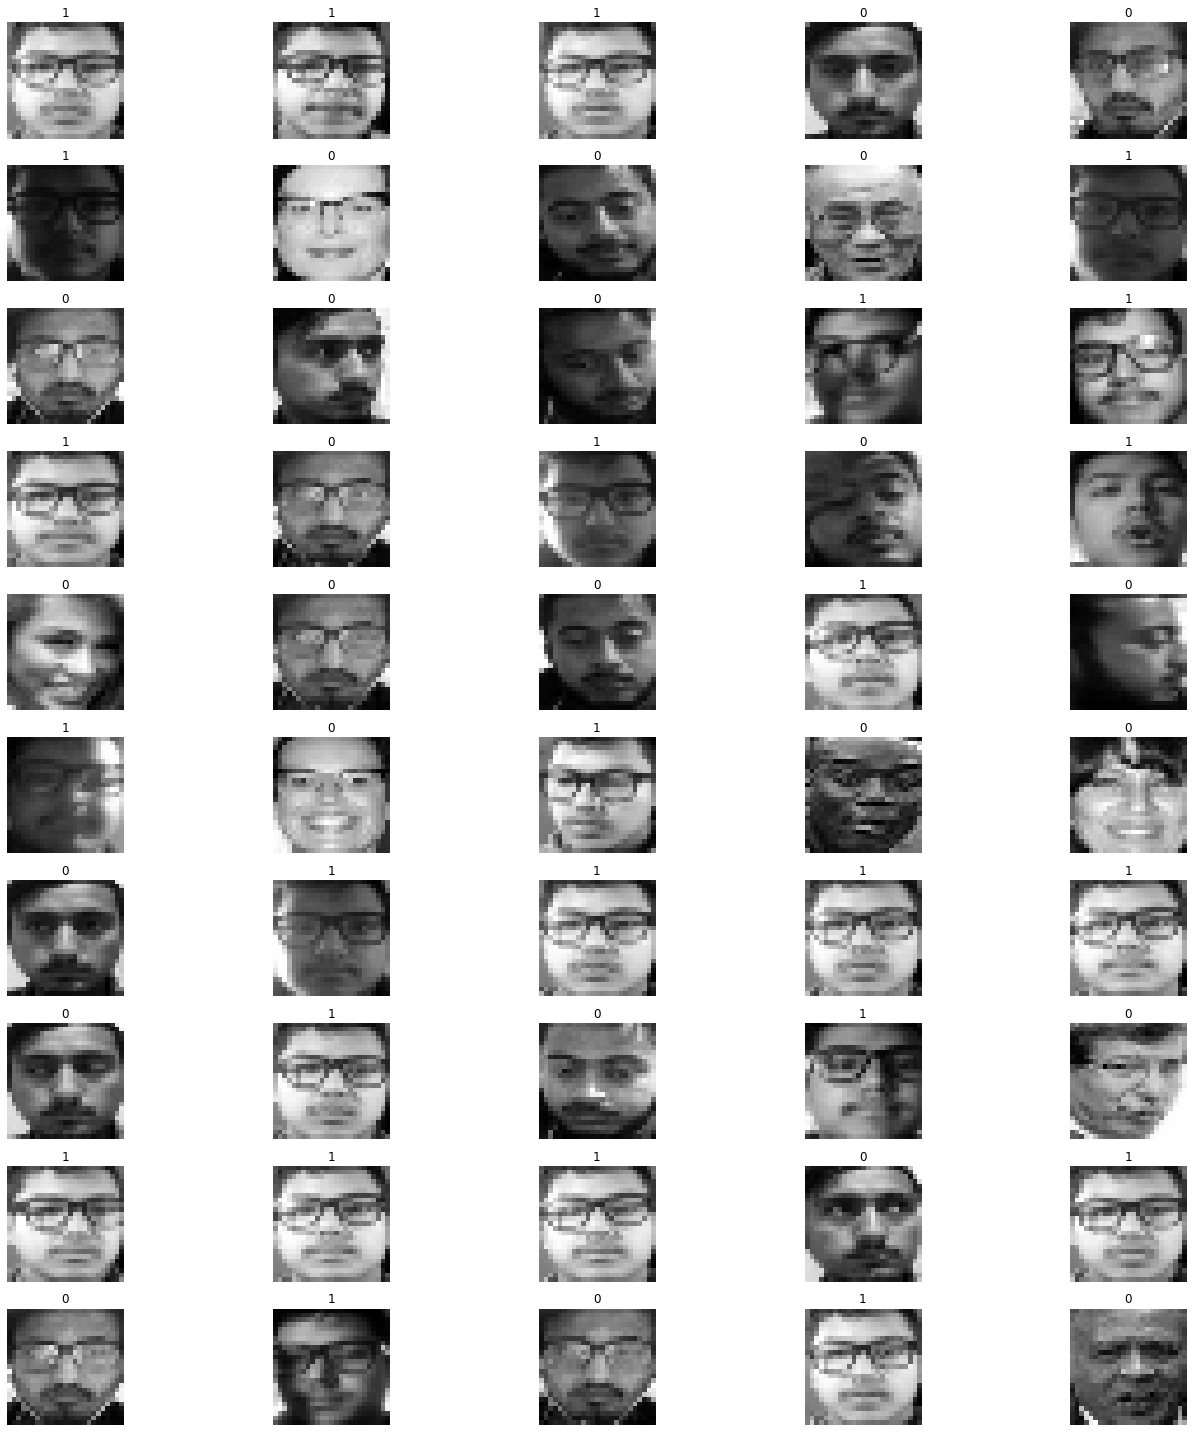

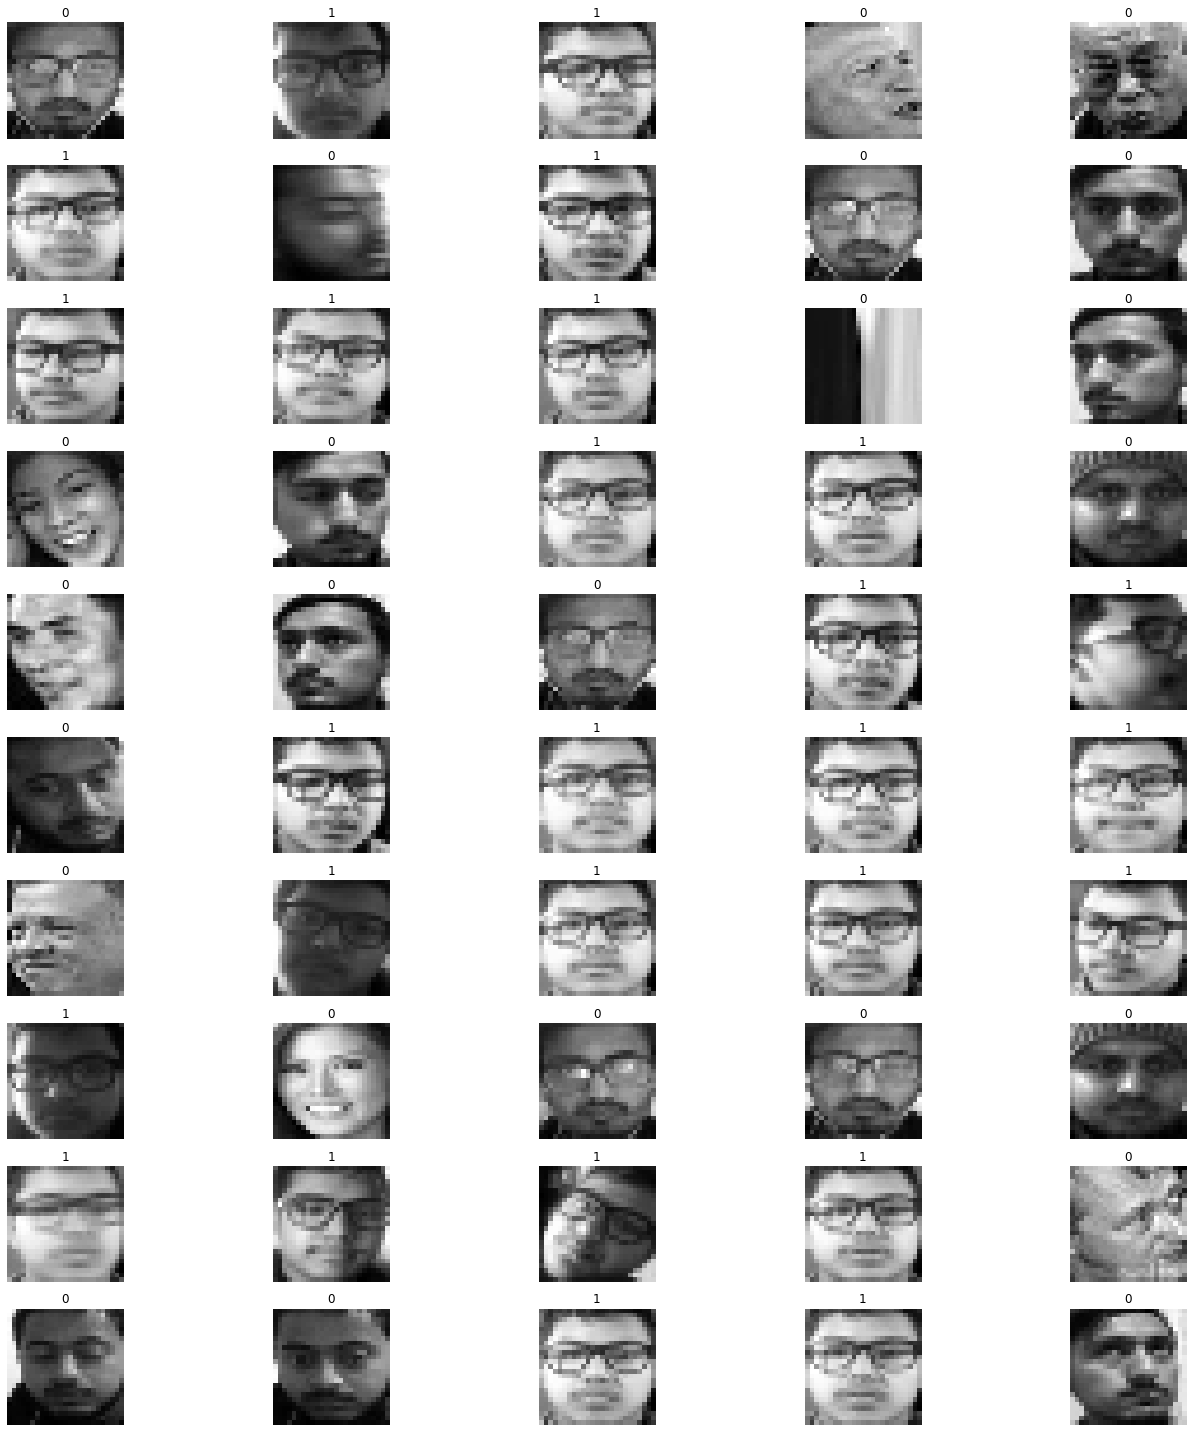

In [216]:
PlotTrainImages(trainX[:50],trainY[:50])
PlotTrainImages(testX[:50],testY[:50])

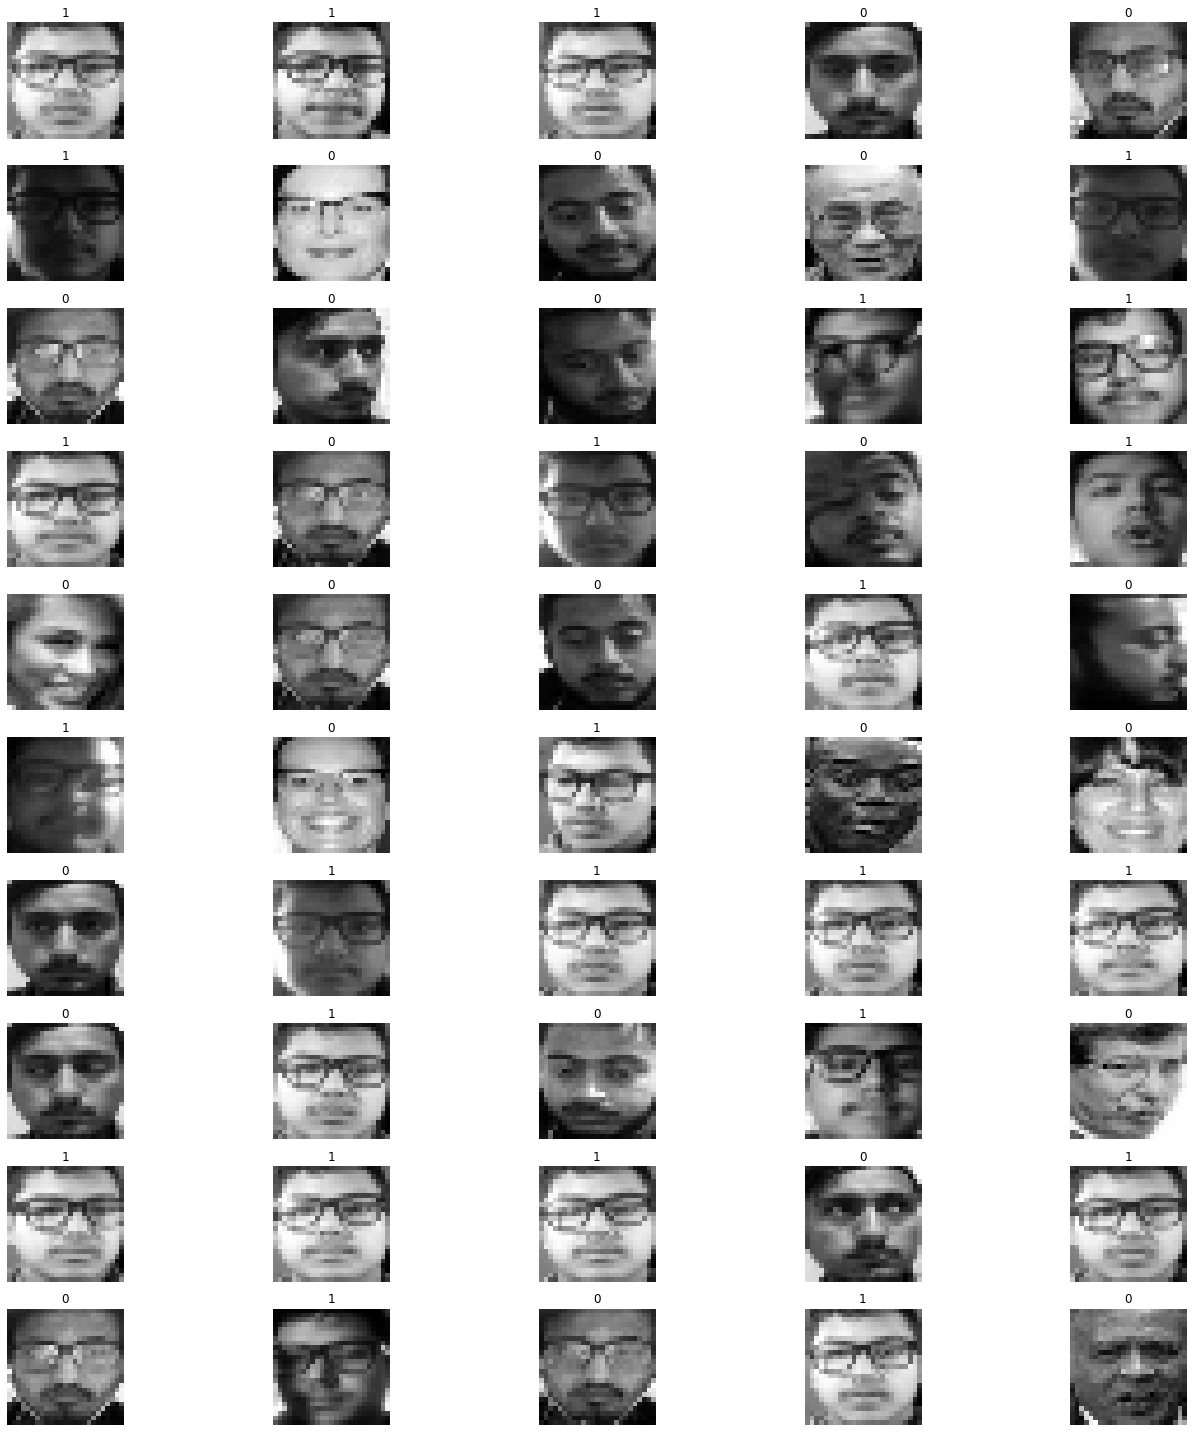

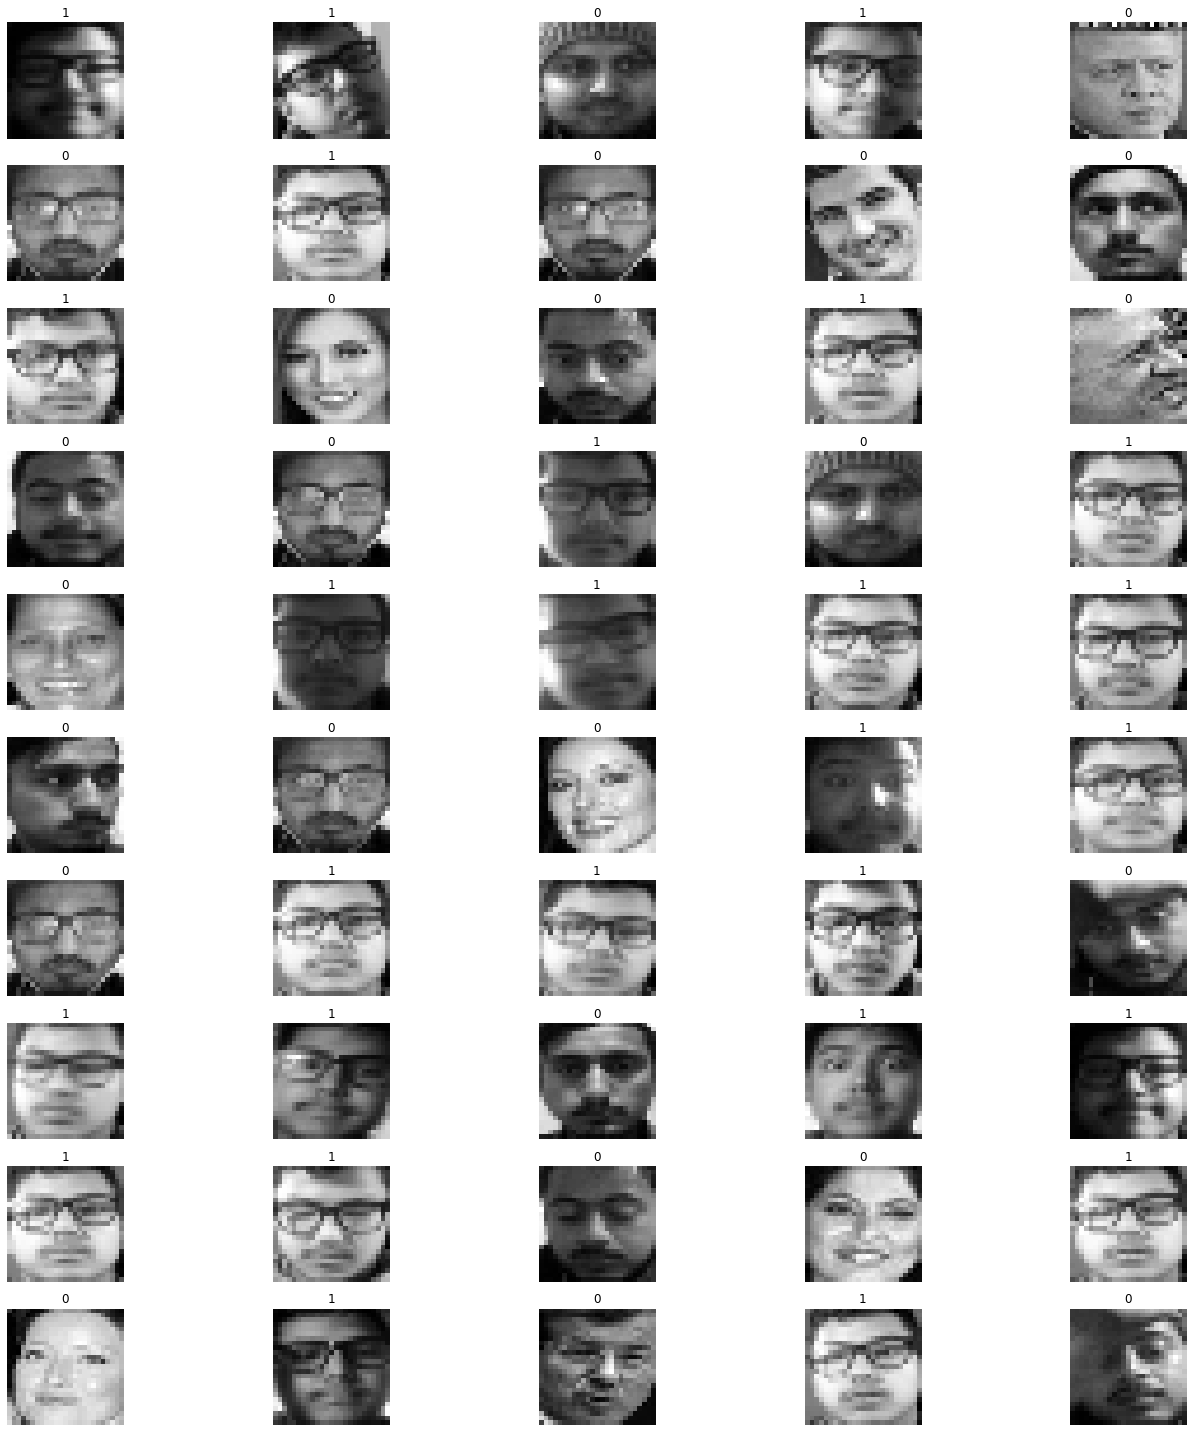

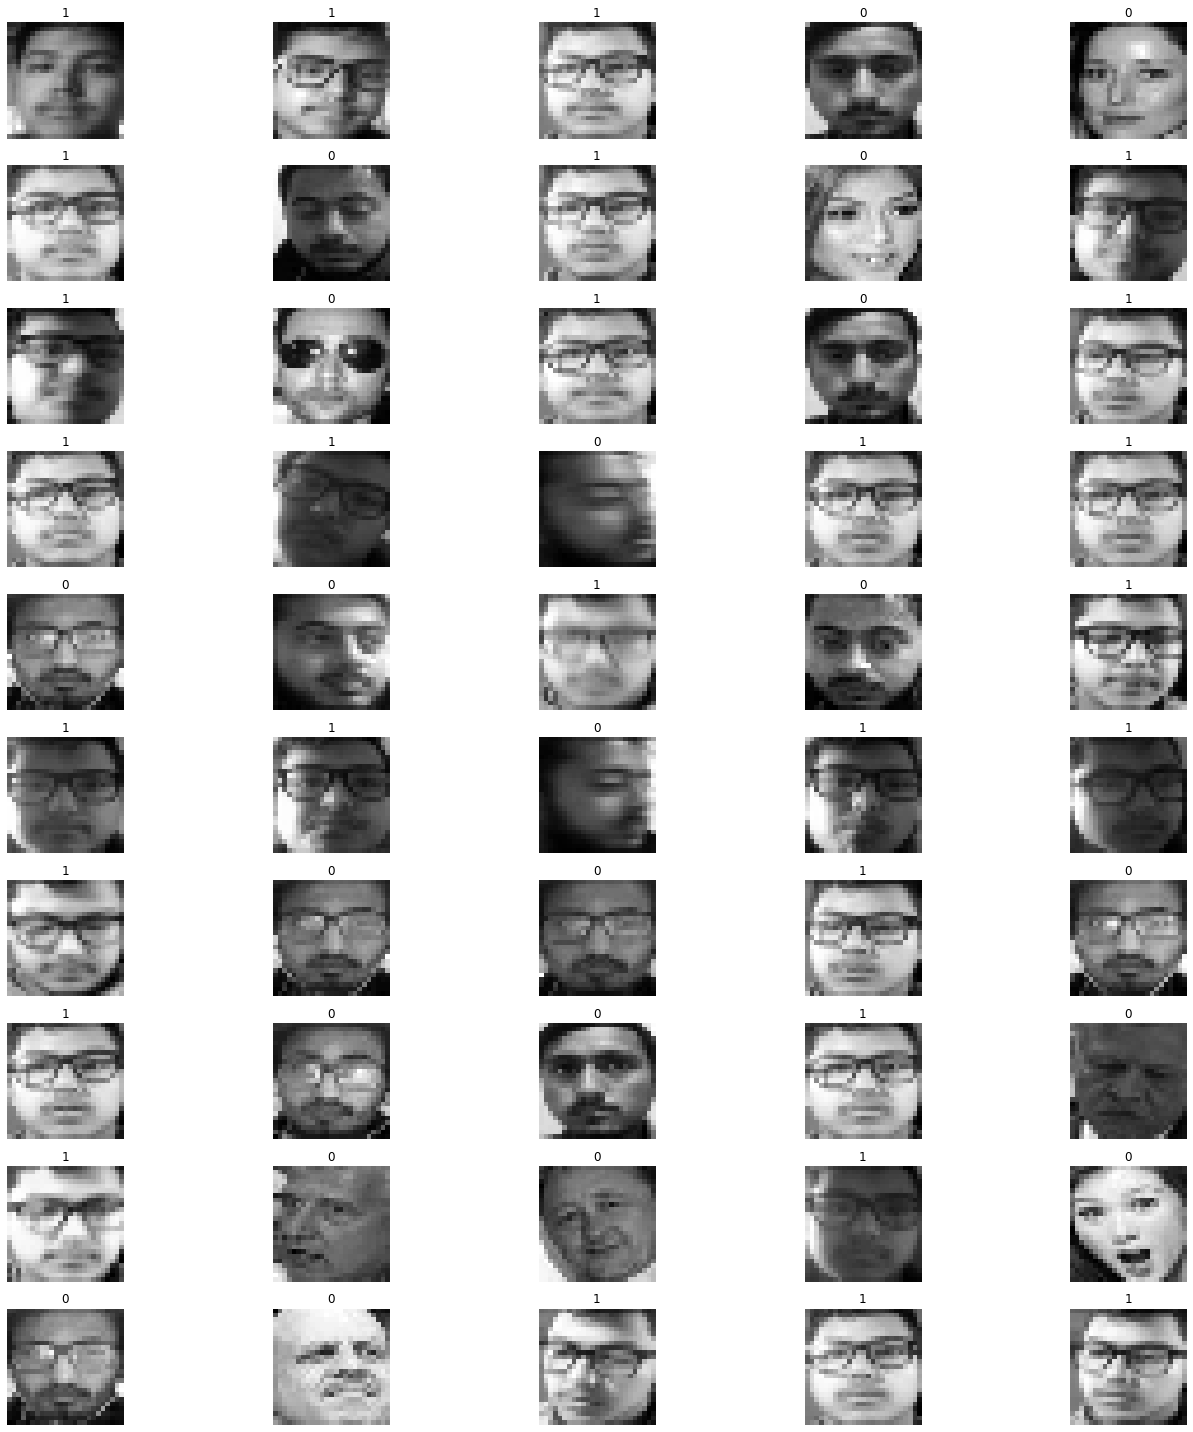

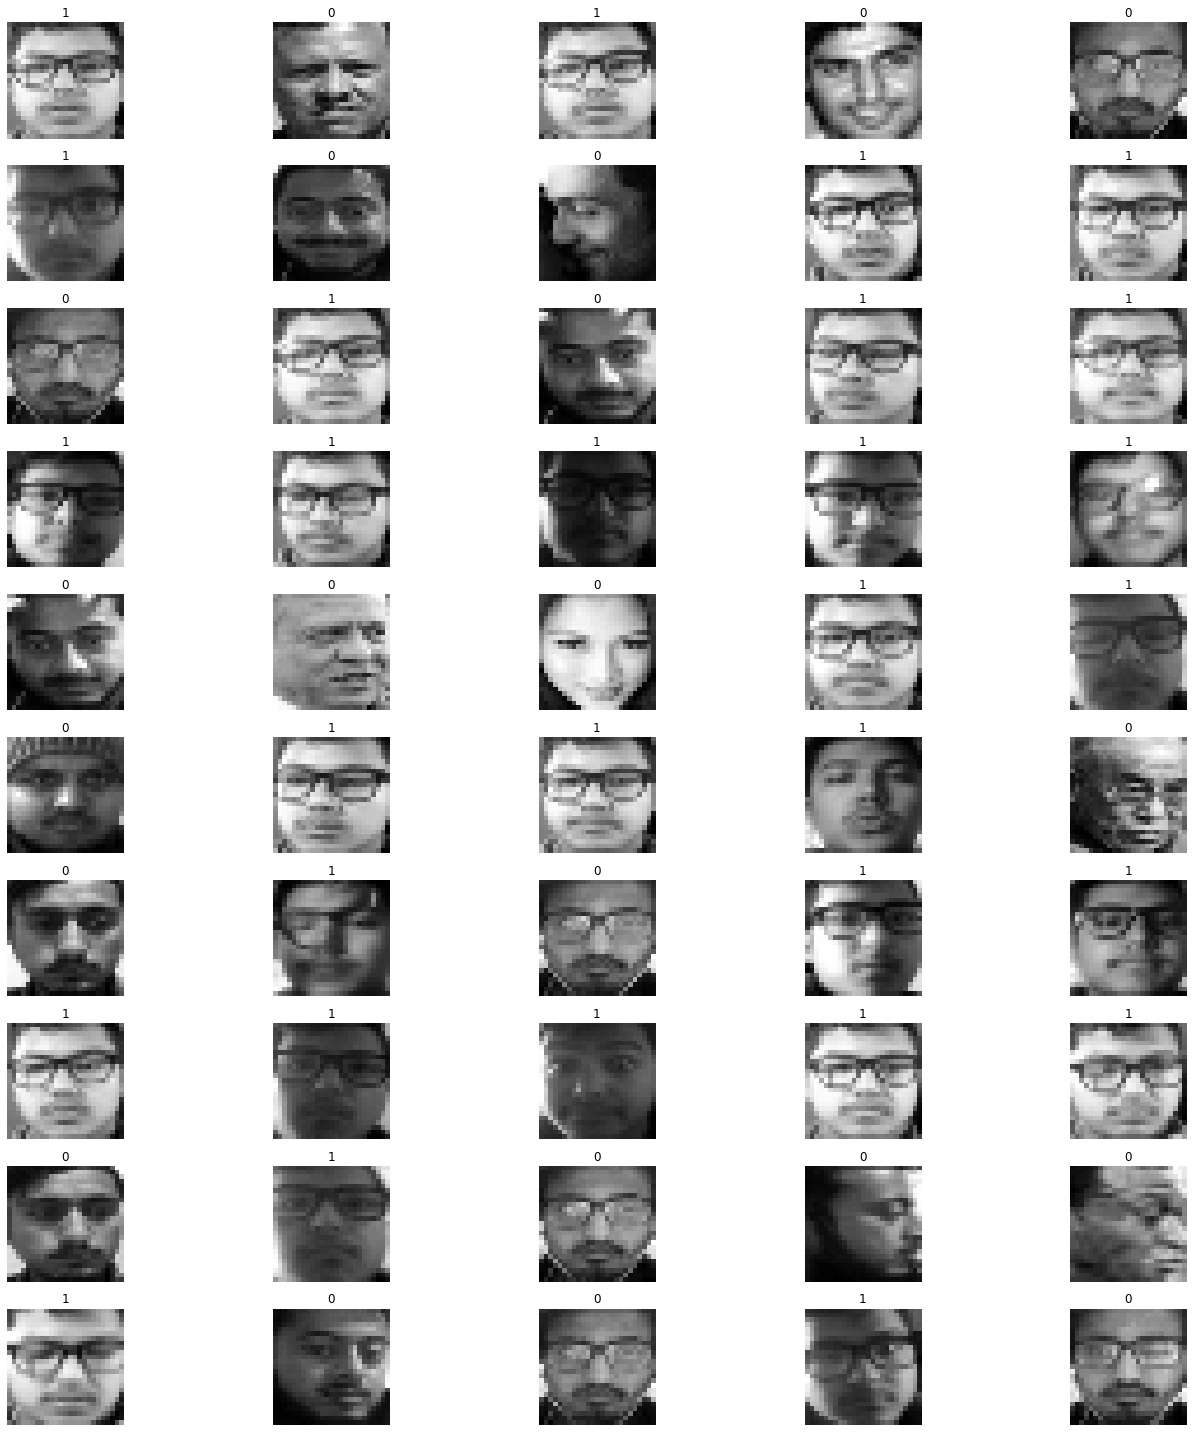

In [217]:
for i in range(0,200,50):
    PlotTrainImages(trainX[i:i+50],trainY[i:i+50])

In [218]:
model = Sequential()
model.add(Conv2D(32, 3, padding = 'same', activation = None, input_shape =(25, 25, 1), kernel_initializer = 'he_normal'))
model.add(BatchNormalization(axis = -1))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))
model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal', activation = None))
model.add(BatchNormalization(axis = -1))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal', activation = None))
model.add(BatchNormalization(axis = -1))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal', activation = None))
model.add(BatchNormalization(axis = -1))
model.add(Activation('relu'))
model.add(Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal', activation = None))
model.add(BatchNormalization(axis = -1))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal', activation = None))
model.add(BatchNormalization(axis = -1))
model.add(Activation('relu'))
model.add(Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal', activation = None))
model.add(BatchNormalization(axis = -1))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62095 (Conv2D)        (None, 25, 25, 32)        320       
_________________________________________________________________
batch_normalization_55 (Batc (None, 25, 25, 32)        128       
_________________________________________________________________
activation_43 (Activation)   (None, 25, 25, 32)        0         
_________________________________________________________________
max_pooling2d_31051 (MaxPool (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_62096 (Conv2D)        (None, 12, 12, 64)        18496     
_________________________________________________________________
batch_normalization_56 (Batc (None, 12, 12, 64)       

In [219]:
# checkpoint = ModelCheckpoint('best_face_model.hdf5', verbose = 1, monitor = 'val_accuracy', save_best_only = True)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [220]:
print(trainX.shape)

(9739, 25, 25, 1)


In [221]:
history = model.fit(x=trainX, y=trainY, epochs=15,batch_size=32,shuffle=True,validation_data= (testX,testY))

Train on 9739 samples, validate on 2435 samples
Epoch 1/15
9739/9739 [==============================] - 116s 12ms/step - loss: 0.3617 - accuracy: 0.8694 - val_loss: 0.2353 - val_accuracy: 0.9565
Epoch 2/15
9739/9739 [==============================] - 113s 12ms/step - loss: 0.1503 - accuracy: 0.9523 - val_loss: 0.1184 - val_accuracy: 0.9704
Epoch 3/15
9739/9739 [==============================] - 114s 12ms/step - loss: 0.0968 - accuracy: 0.9655 - val_loss: 0.0977 - val_accuracy: 0.9770
Epoch 4/15
9739/9739 [==============================] - 114s 12ms/step - loss: 0.0711 - accuracy: 0.9774 - val_loss: 0.0496 - val_accuracy: 0.9869
Epoch 5/15
9739/9739 [==============================] - 114s 12ms/step - loss: 0.0627 - accuracy: 0.9796 - val_loss: 0.0743 - val_accuracy: 0.9807
Epoch 6/15
9739/9739 [==============================] - 113s 12ms/step - loss: 0.0459 - accuracy: 0.9854 - val_loss: 0.0095 - val_accuracy: 0.9988
Epoch 7/15
9739/9739 [==============================] - 114s 12ms/step

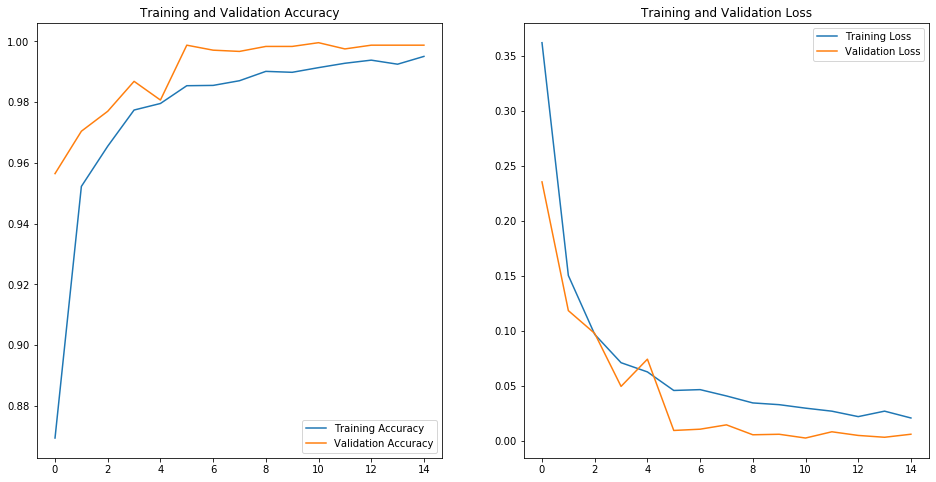

In [223]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

pyplot.figure(figsize=(16, 8))
pyplot.subplot(1, 2, 1)
pyplot.plot(epochs_range, acc, label='Training Accuracy')
pyplot.plot(epochs_range, val_acc, label='Validation Accuracy')
pyplot.legend(loc='lower right')
pyplot.title('Training and Validation Accuracy')

pyplot.subplot(1, 2, 2)
pyplot.plot(epochs_range, loss, label='Training Loss')
pyplot.plot(epochs_range, val_loss, label='Validation Loss')
pyplot.legend(loc='upper right')
pyplot.title('Training and Validation Loss')
pyplot.show()

In [224]:
model.save(model_name)

In [225]:
res = model.predict_classes(np.expand_dims(testX[0],axis=0))
print(res)

[[0]]


In [7]:
model = load_model(model_name)

In [227]:
res = model.predict_classes(np.expand_dims(testX[0],axis=0))
print(res)

[[0]]


In [229]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotTestImages(images_arr,labels):
    fig, axes = pyplot.subplots(10, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax,lbl in zip( images_arr, axes,labels):
        img2 = img.reshape((25,25))
        ax.imshow(img2,pyplot.cm.gray)
        title= "Intruder Alert!!!"
        predicted_val = model.predict_classes(np.expand_dims(img,axis=0))[0]
        if (predicted_val):
            title= "User"
        else:
            if(lbl):title= "Incorrectly Classified"
            
        ax.set_title(title)
#         print(model.predict_classes(np.expand_dims(img,axis=0))[0])
        ax.axis('off')
    pyplot.tight_layout()
    pyplot.show()

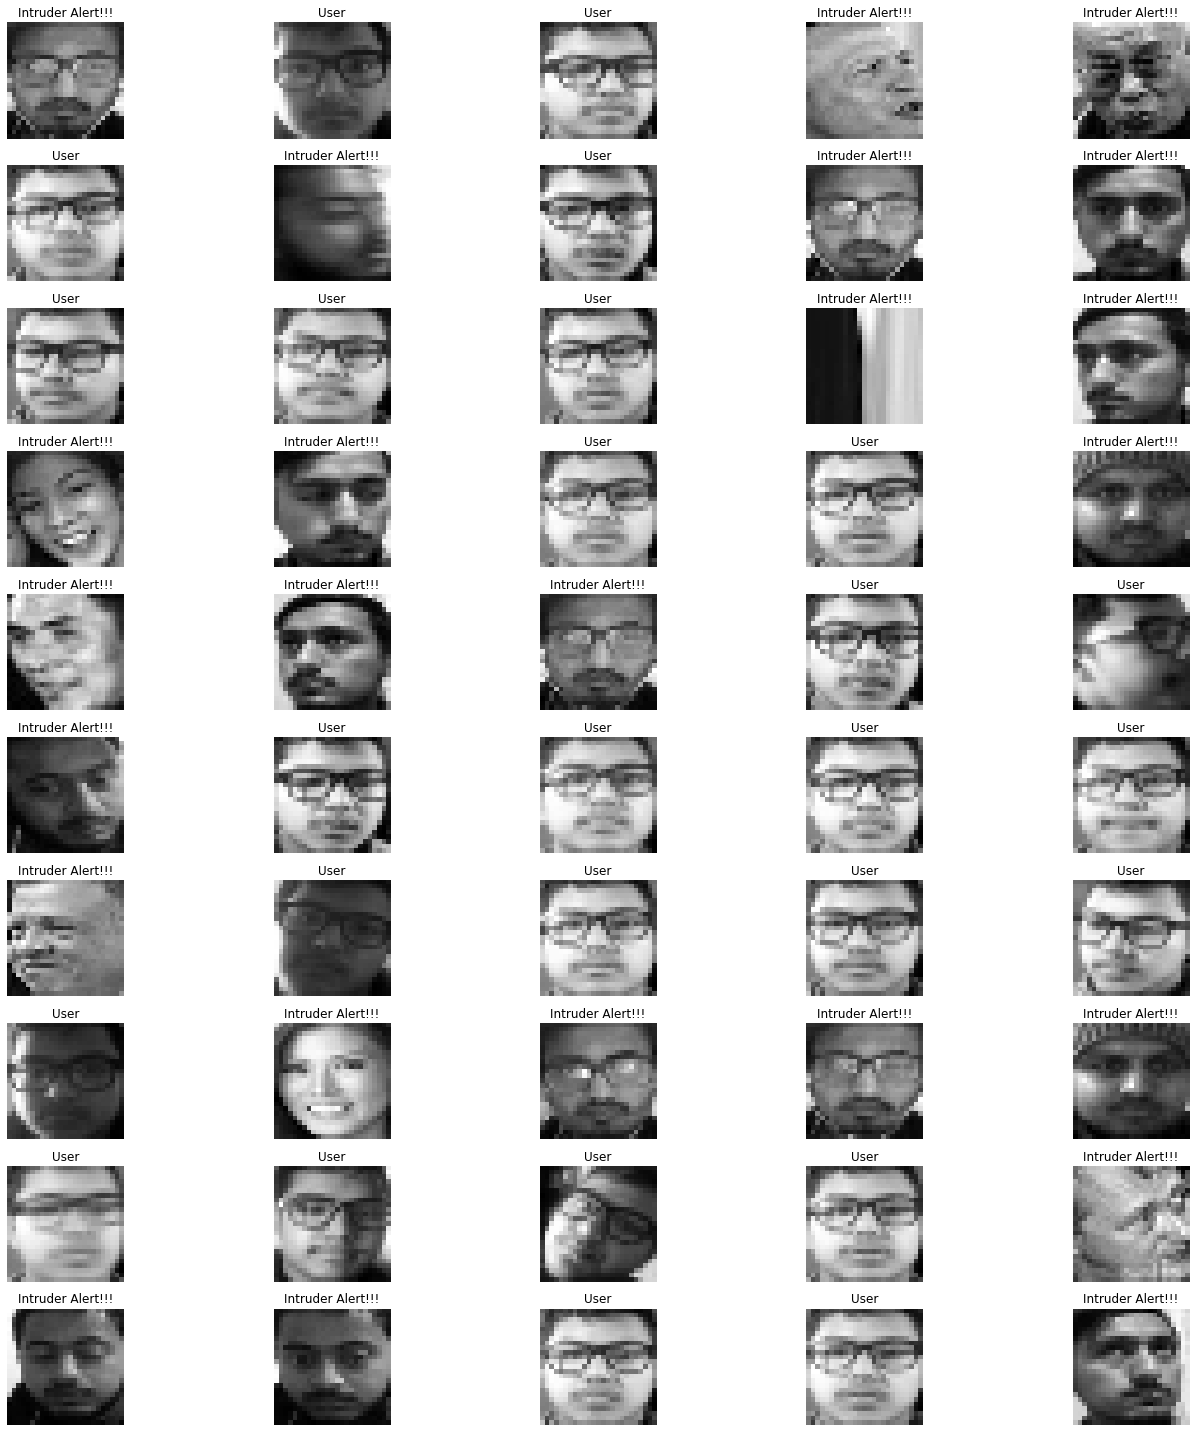

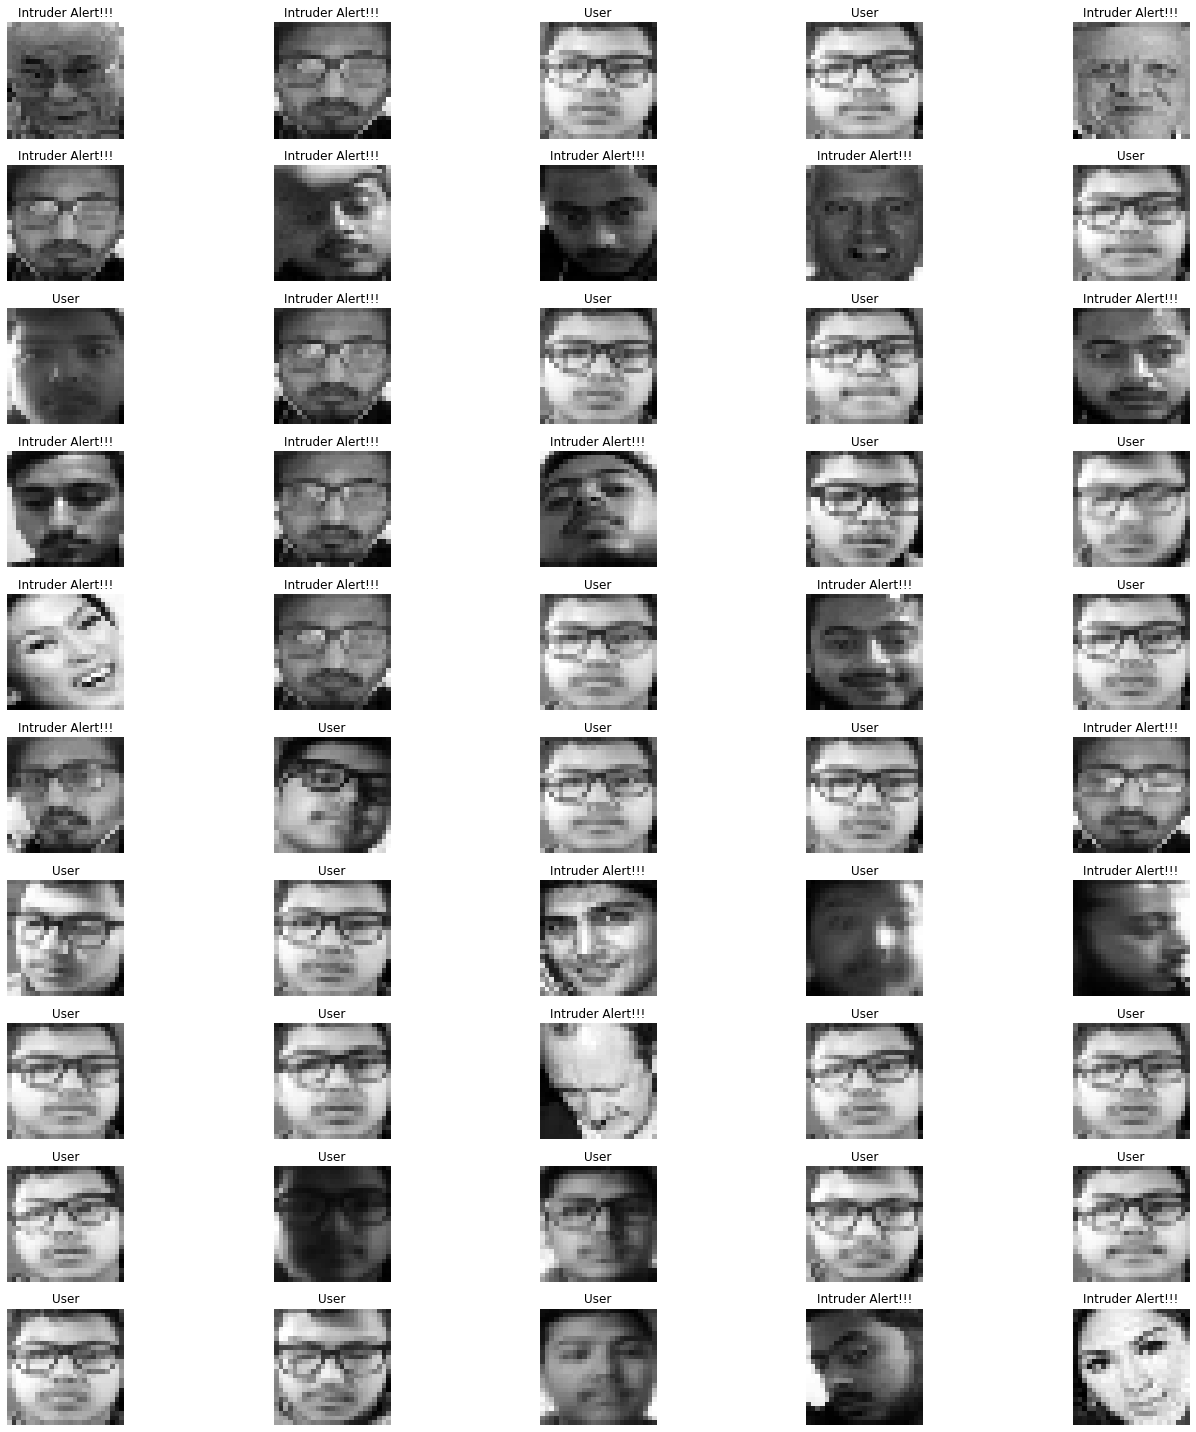

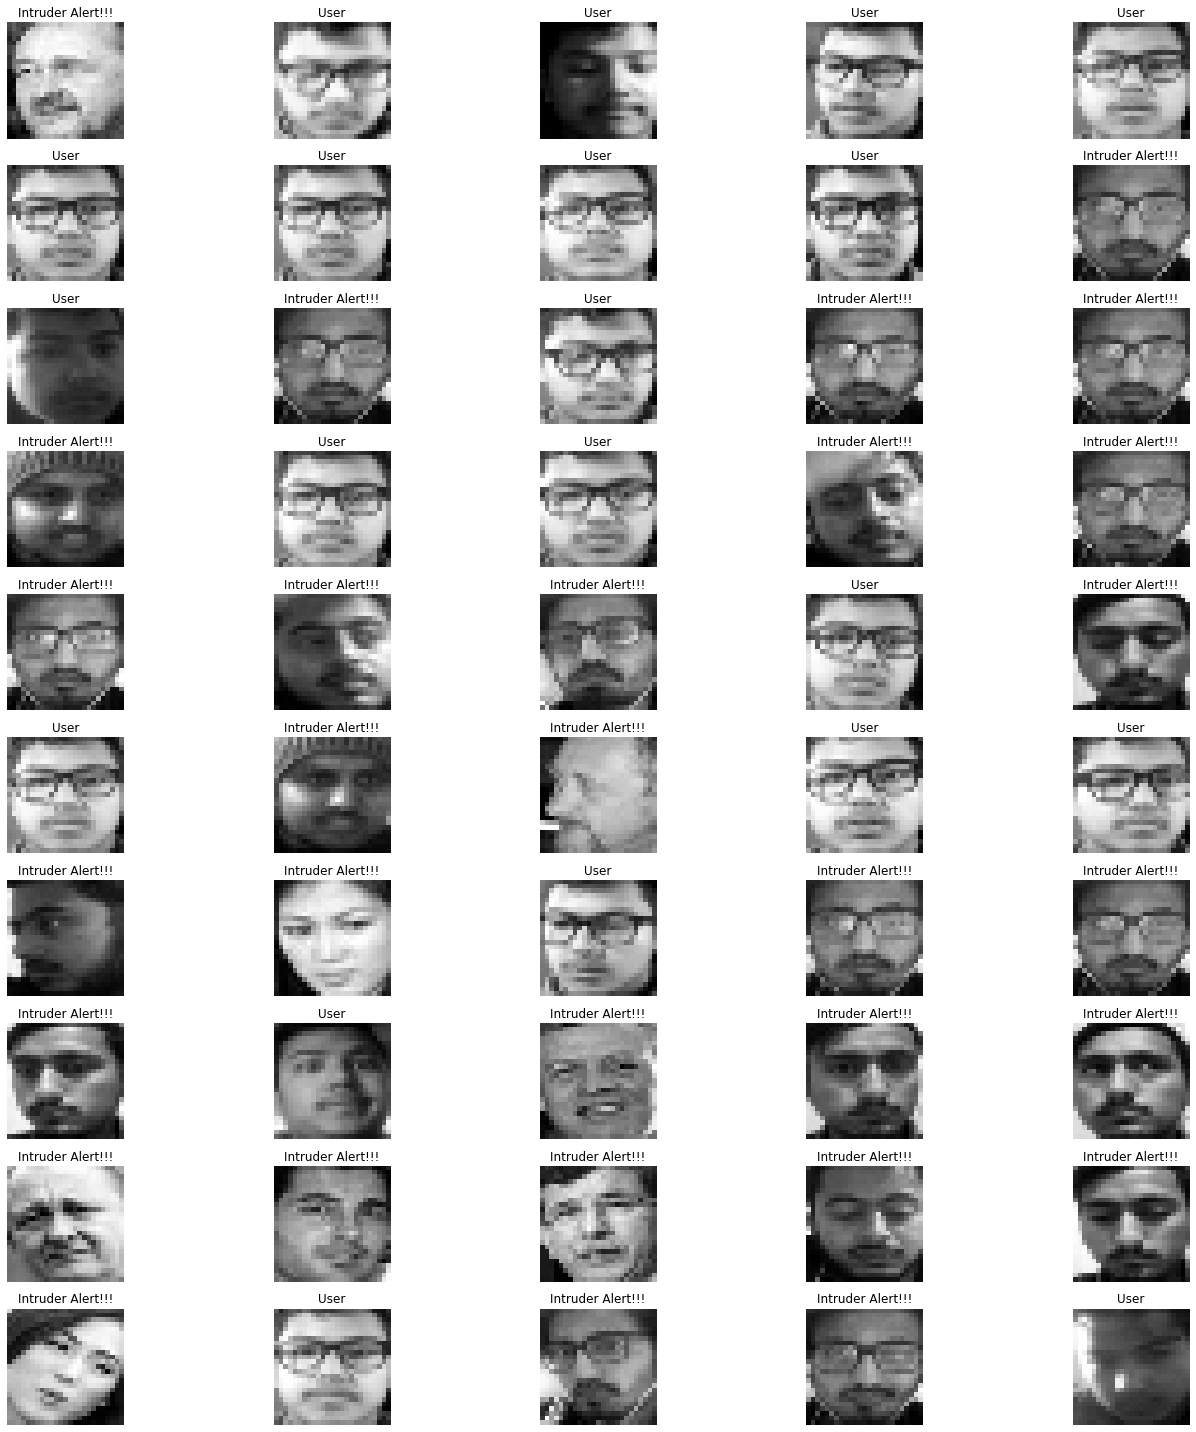

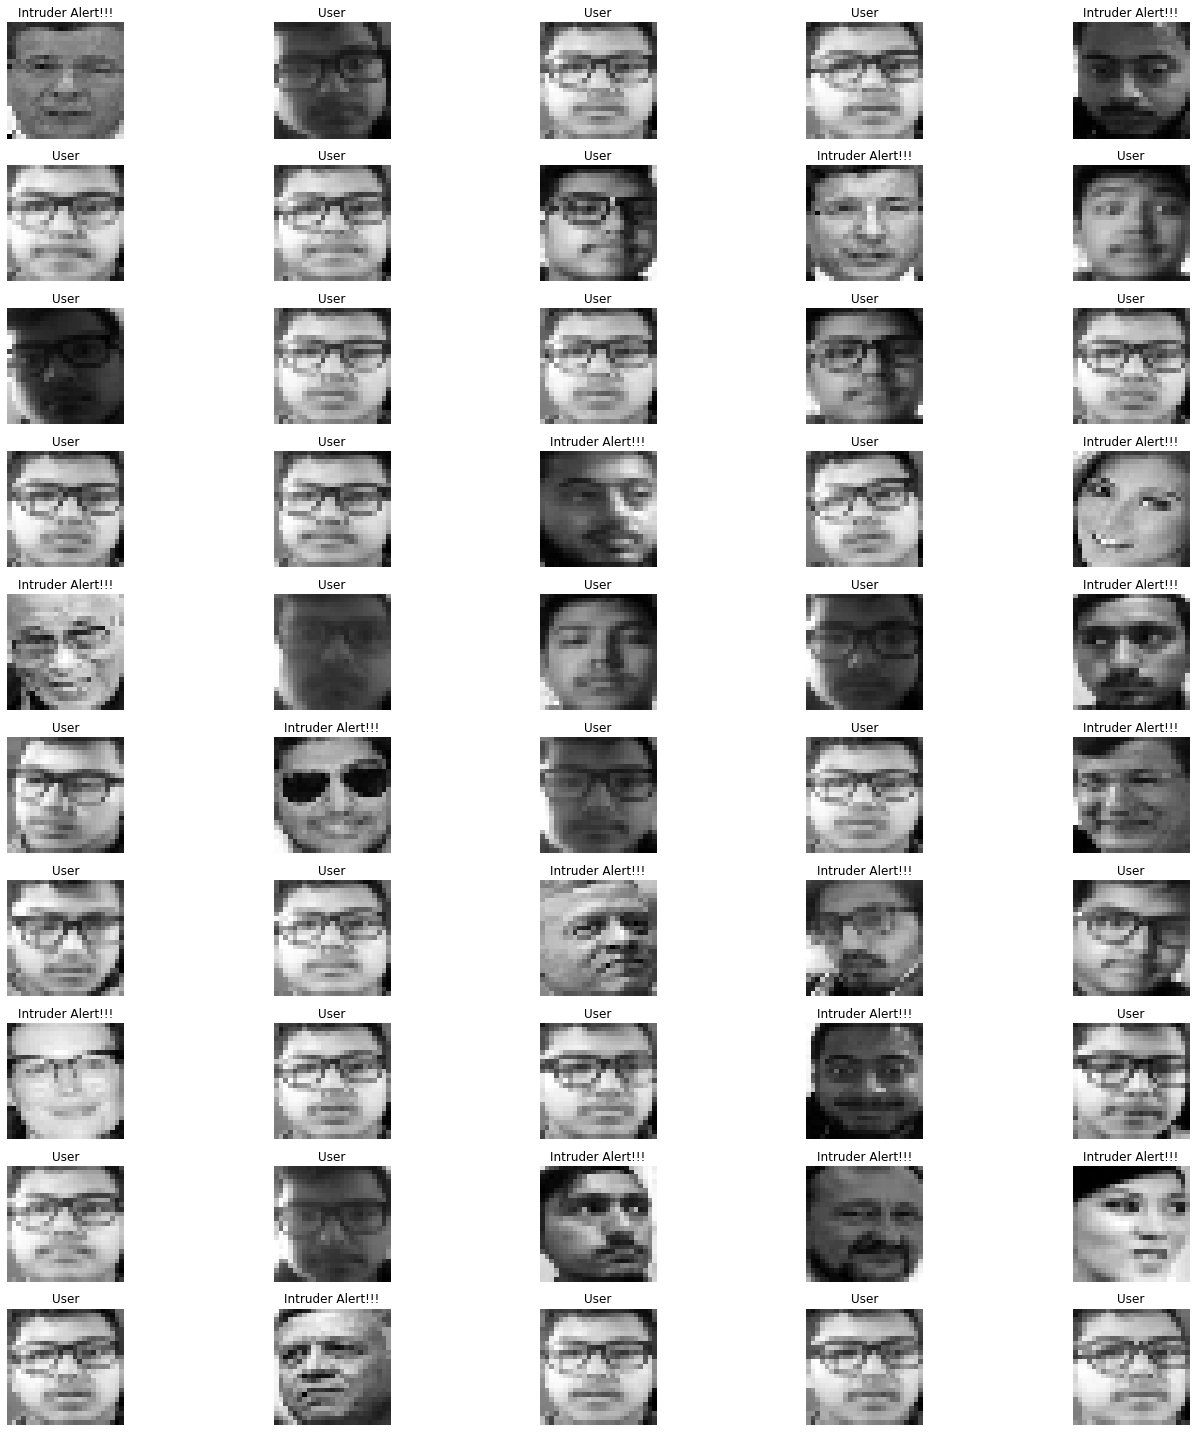

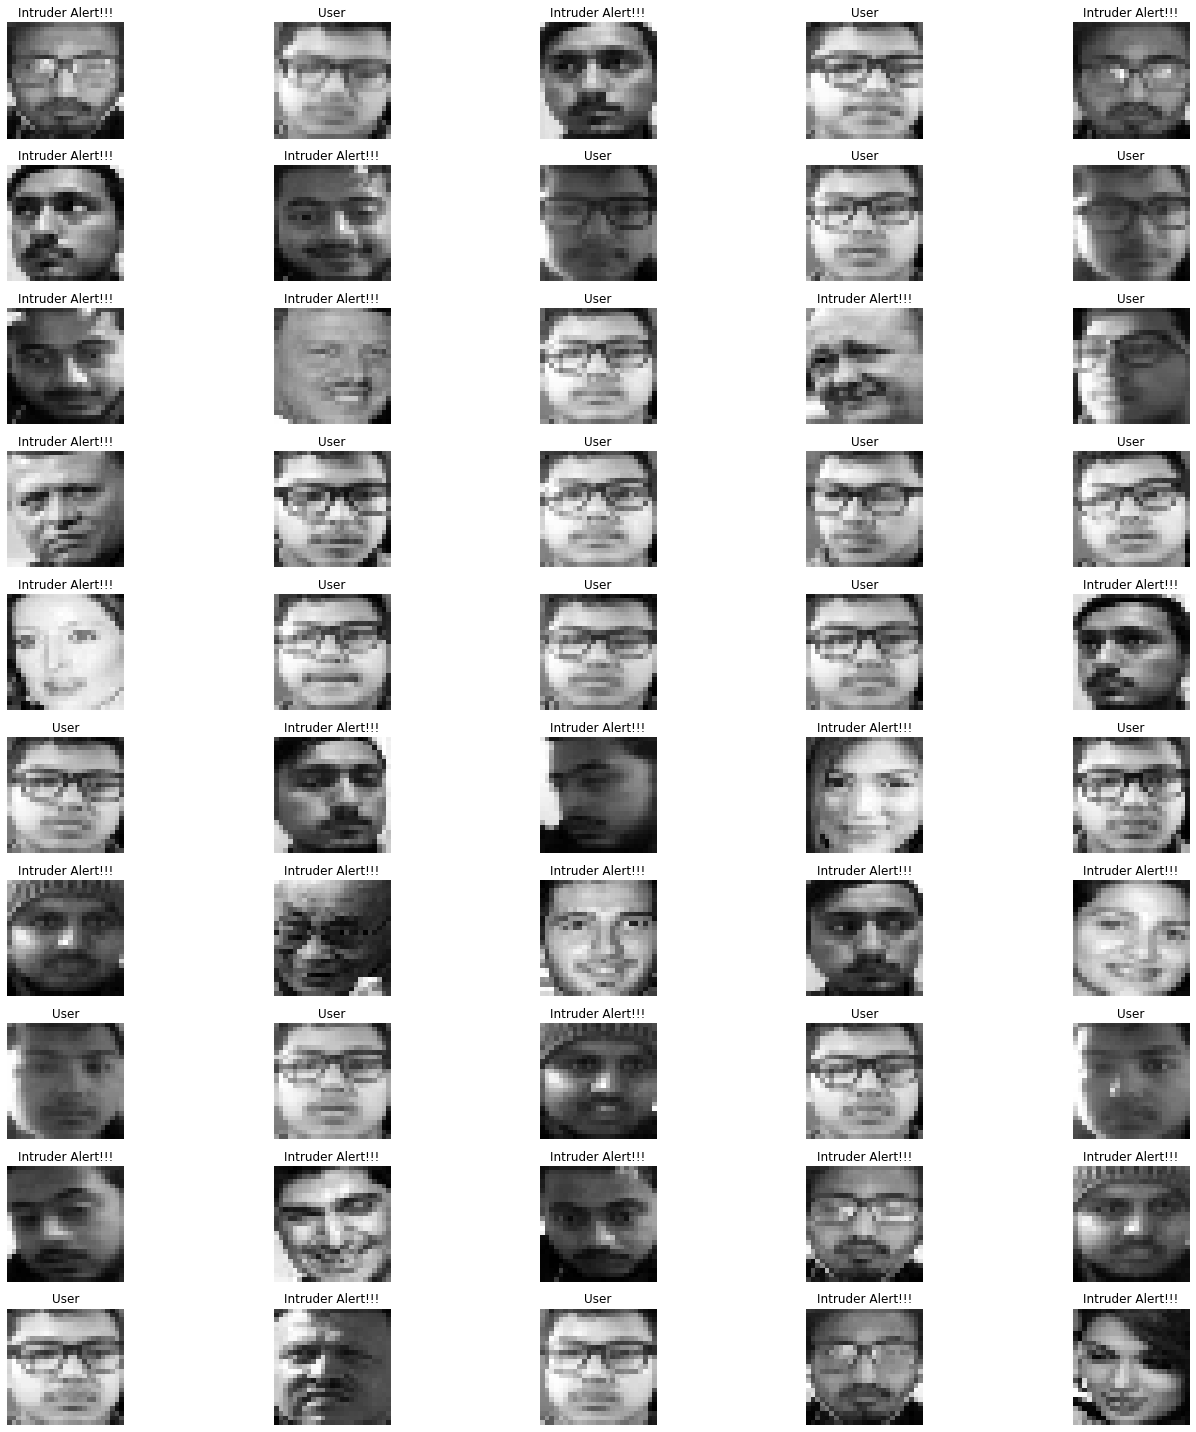

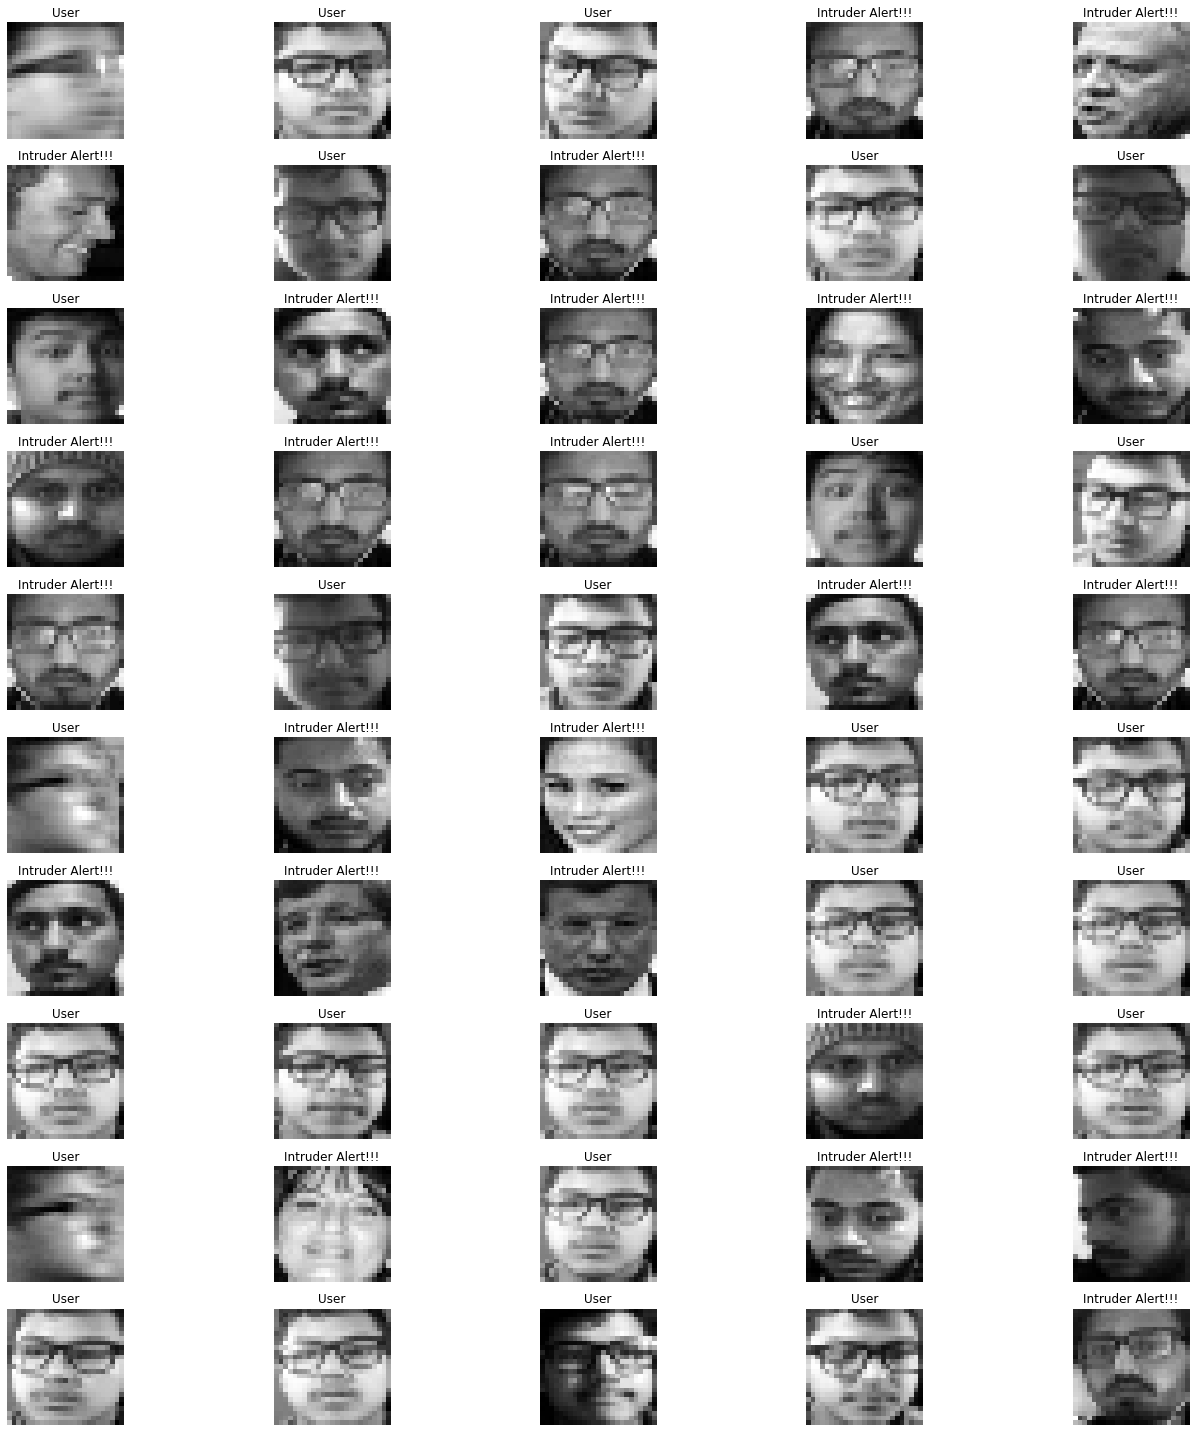

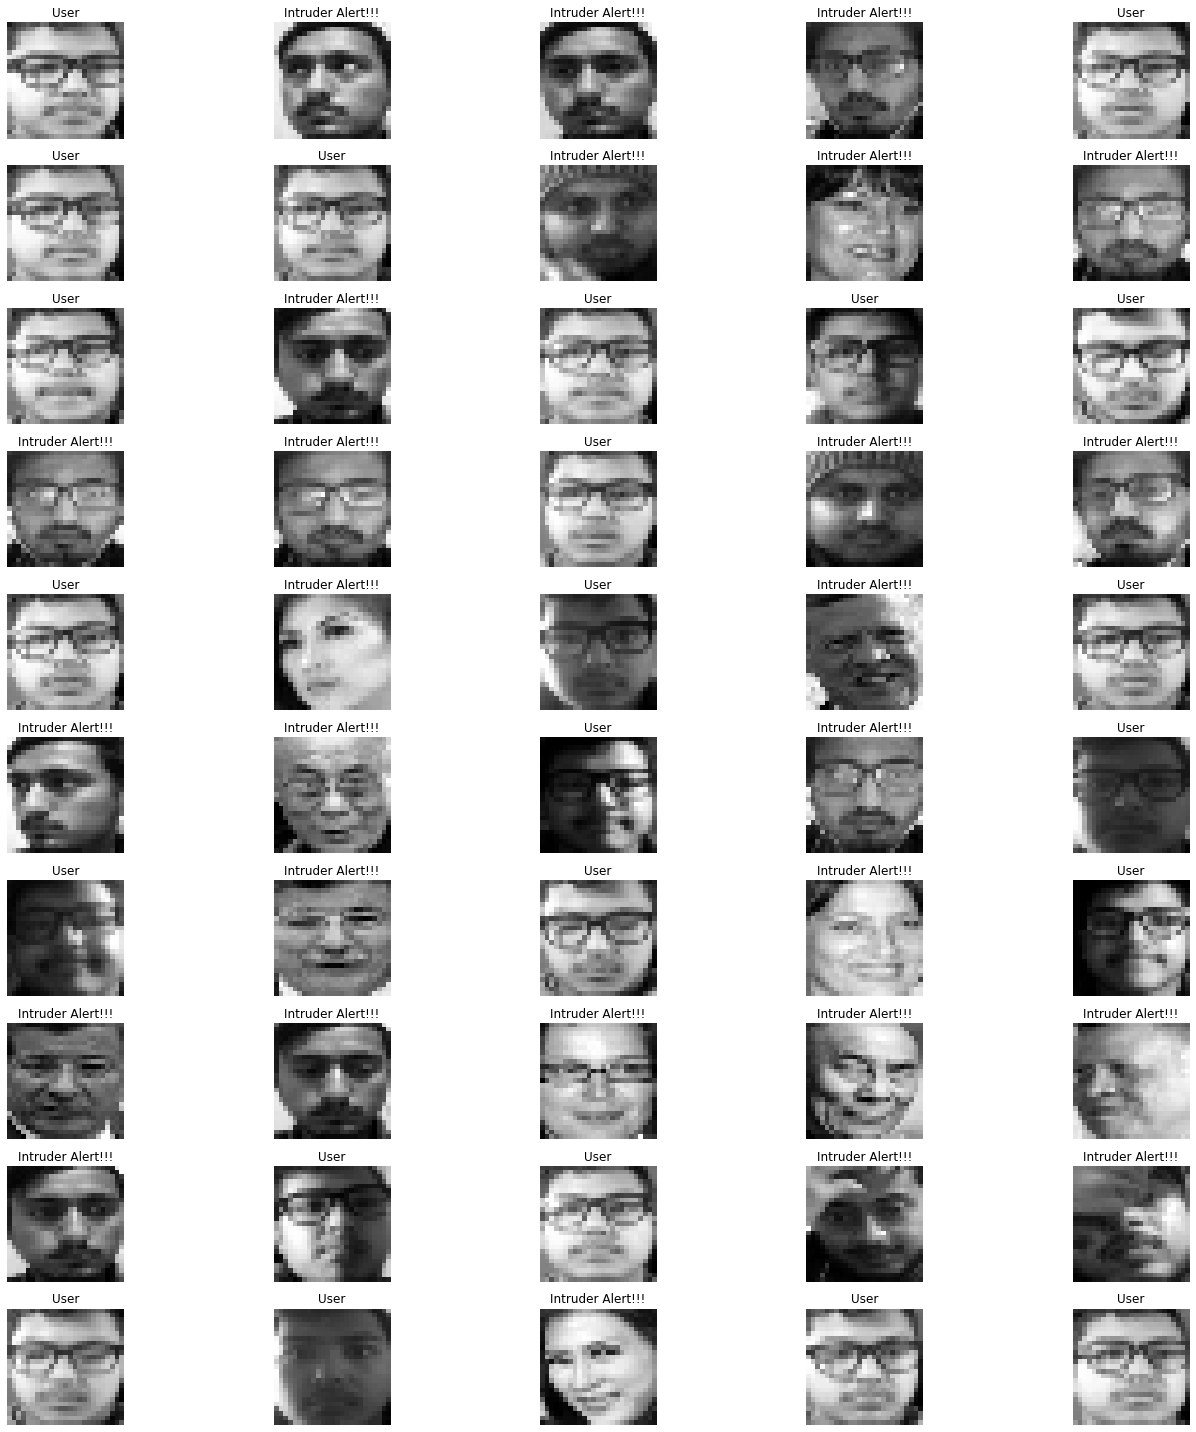

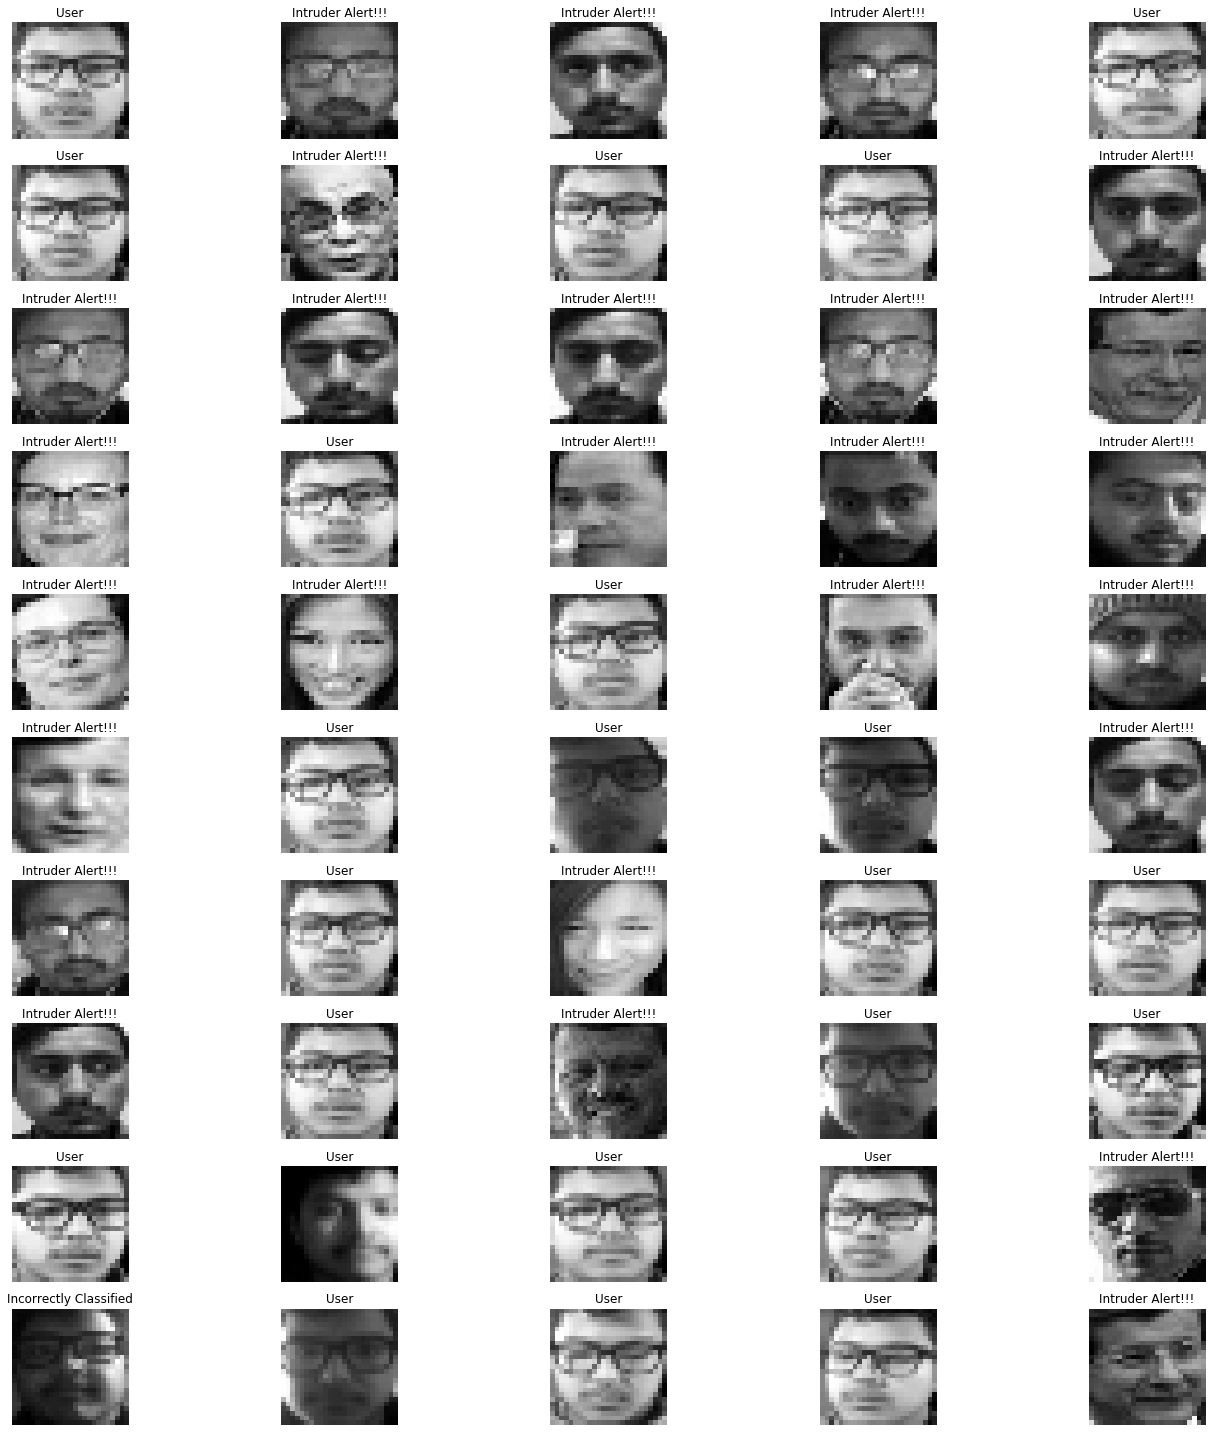

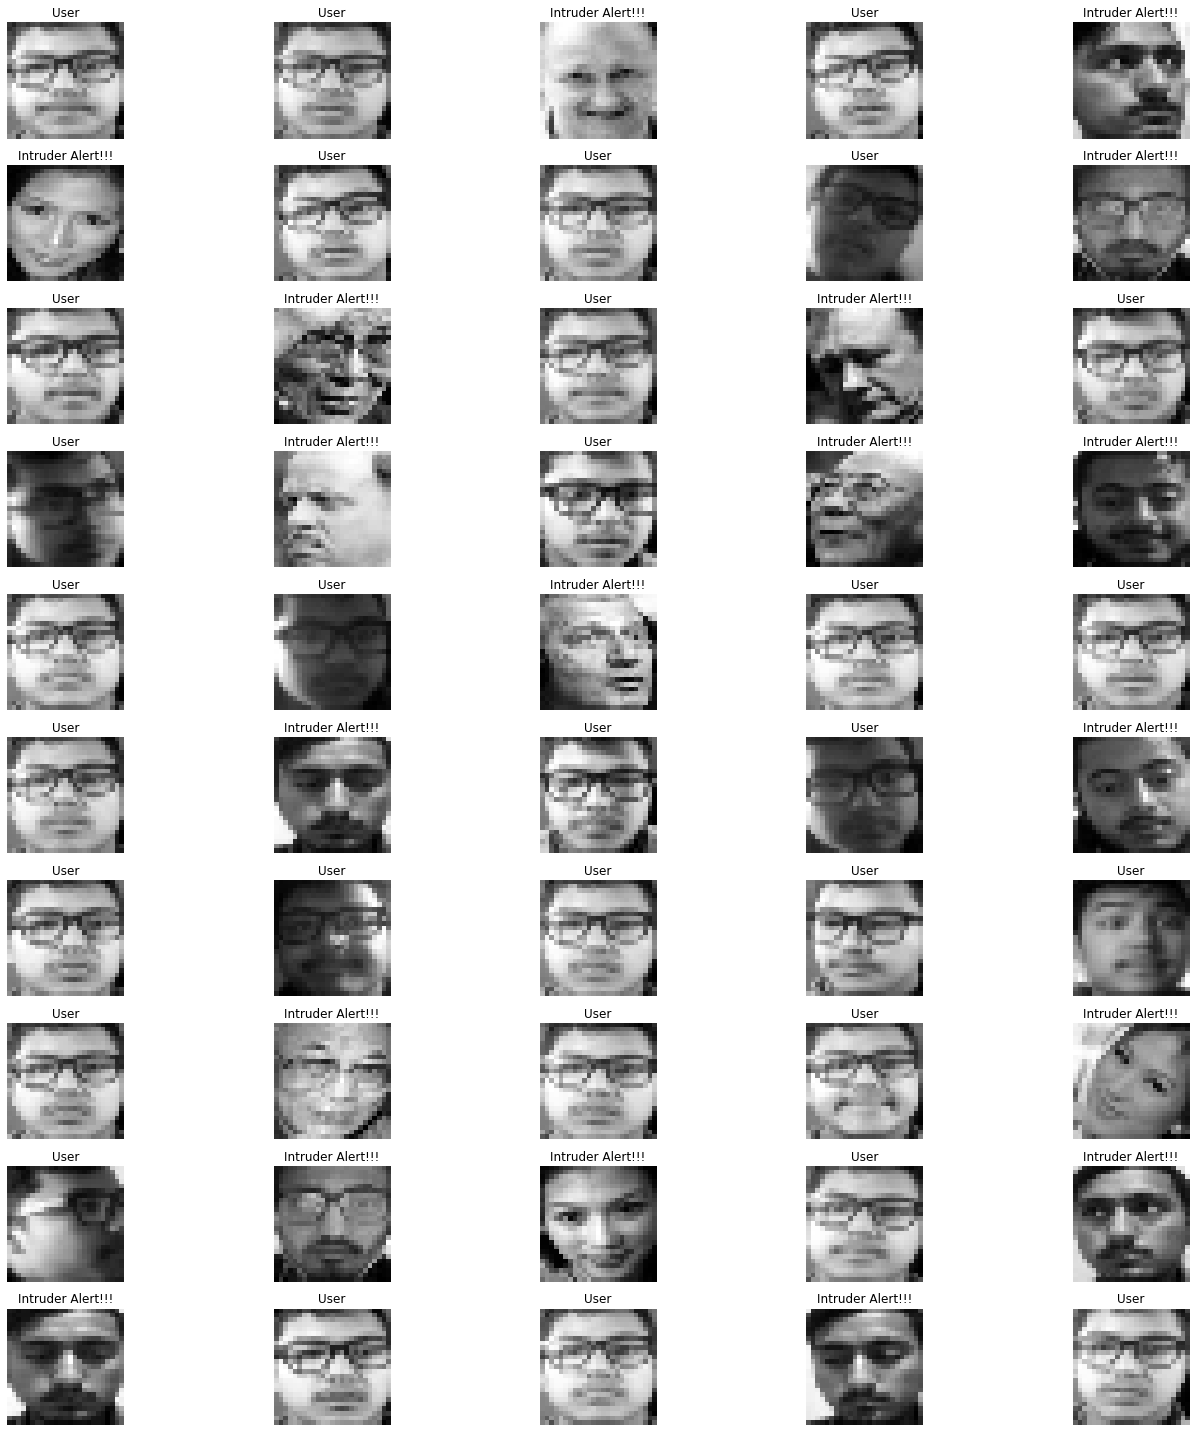

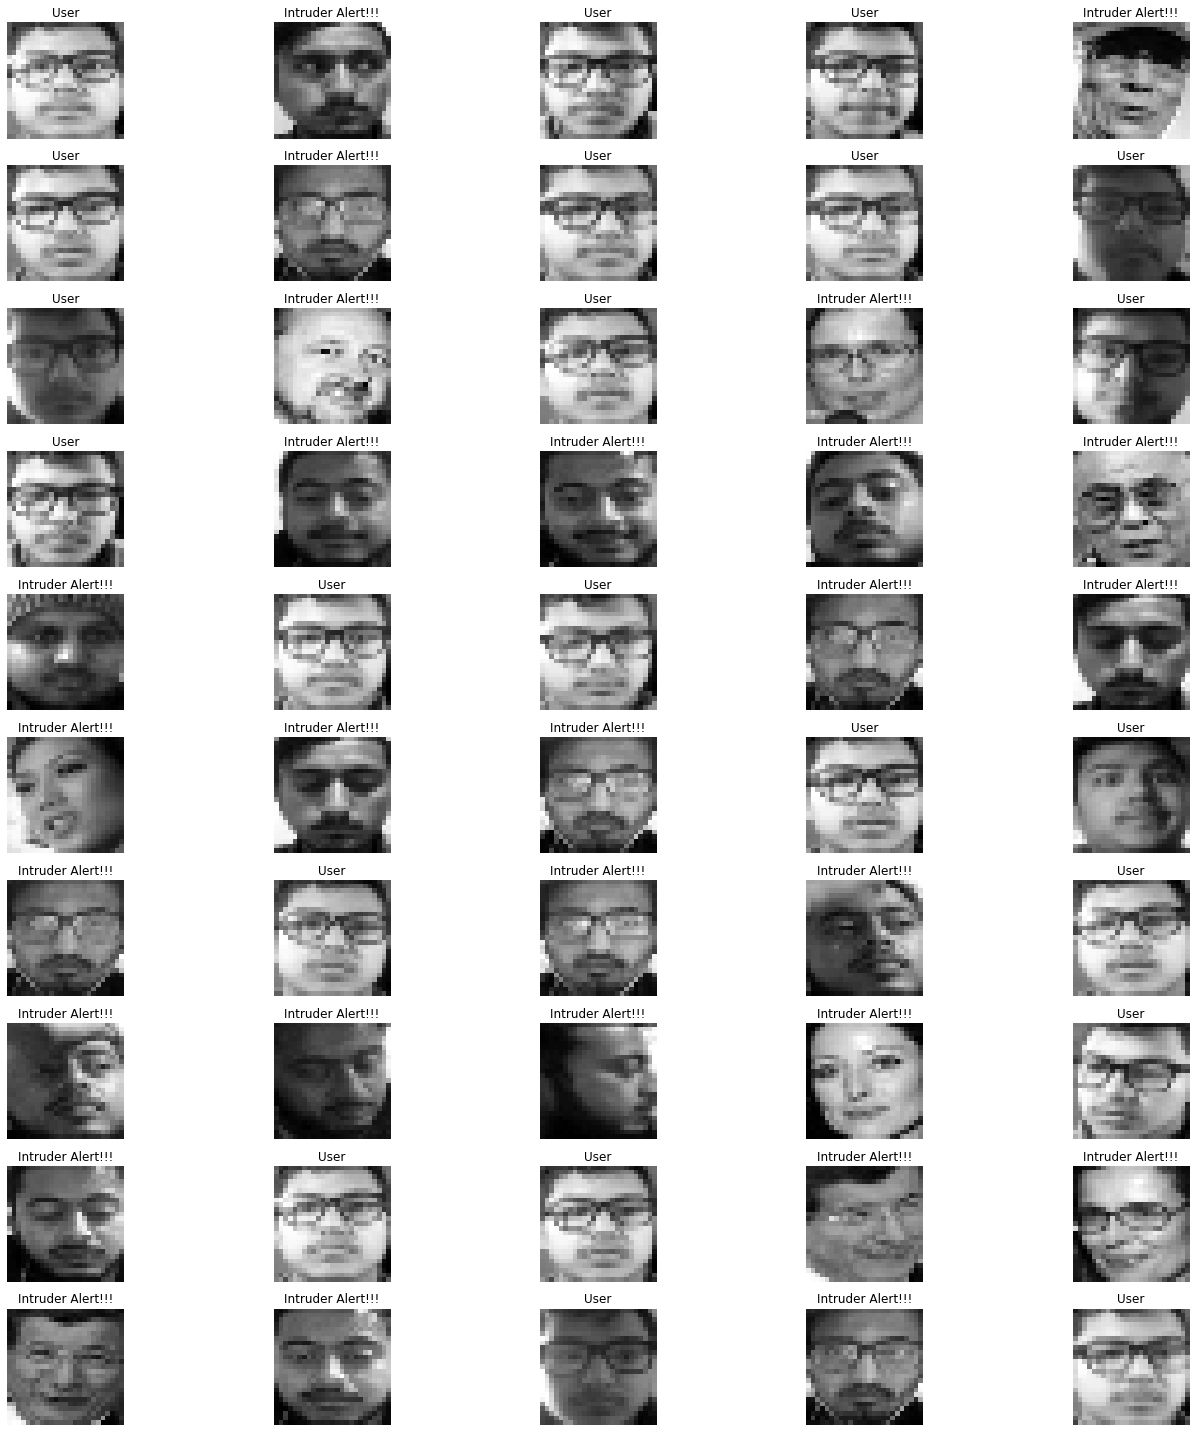

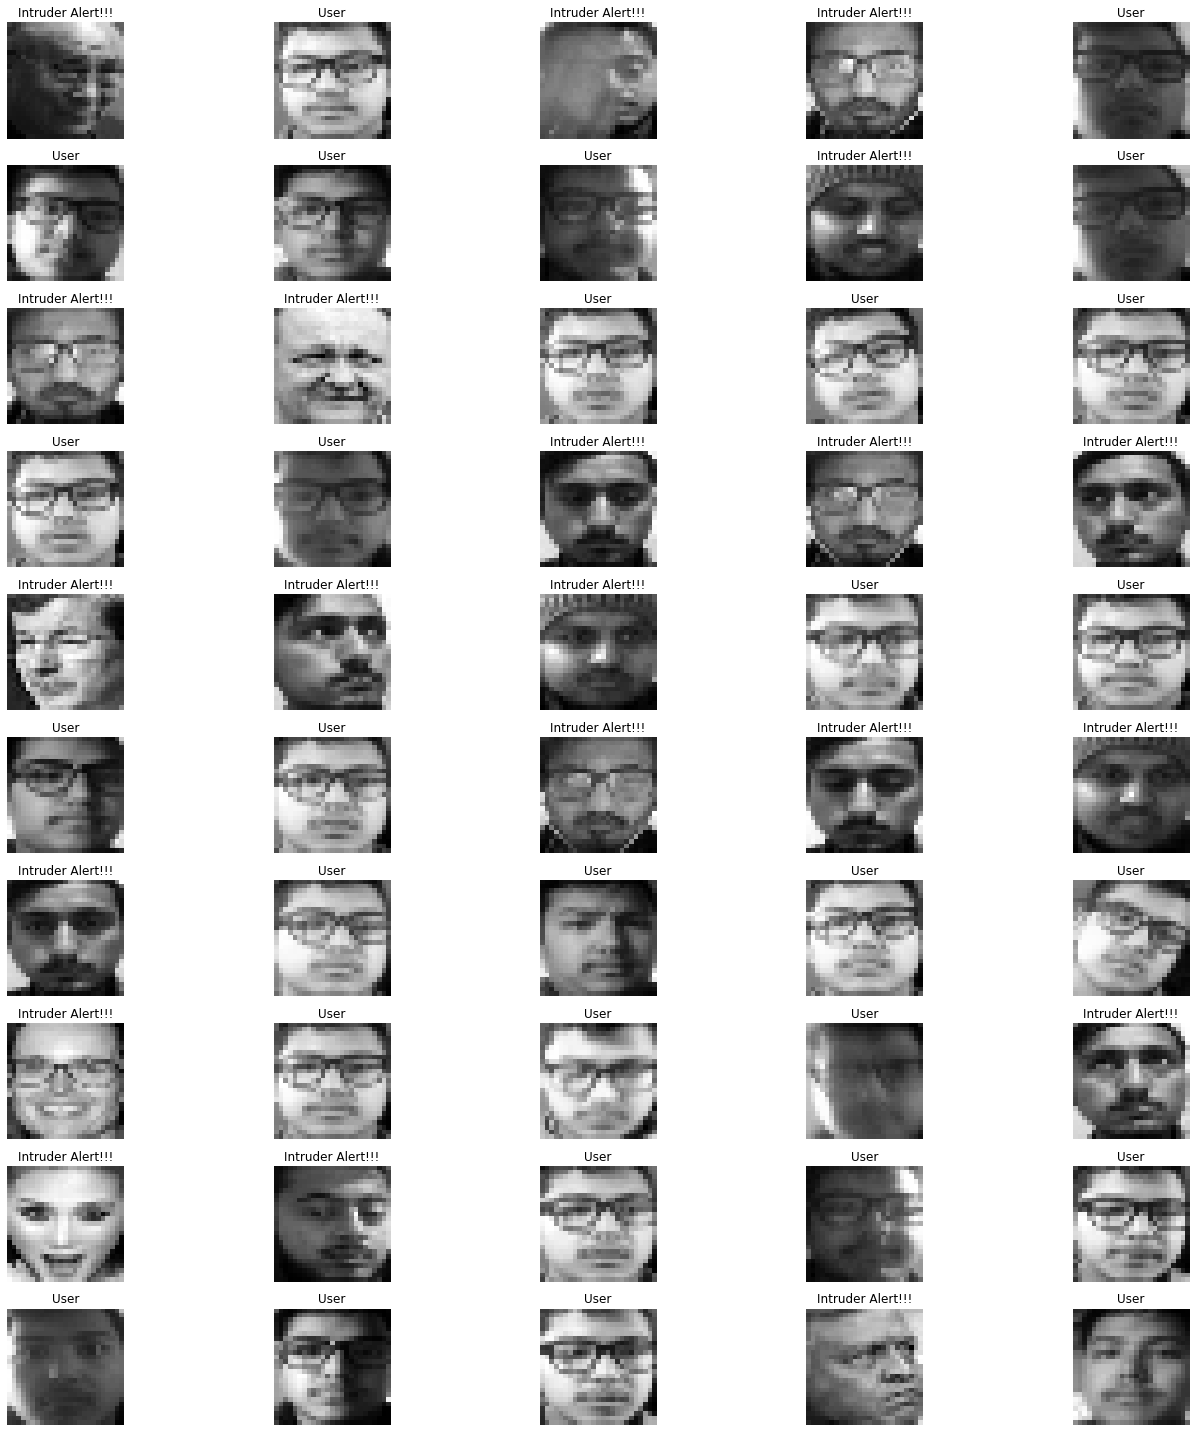

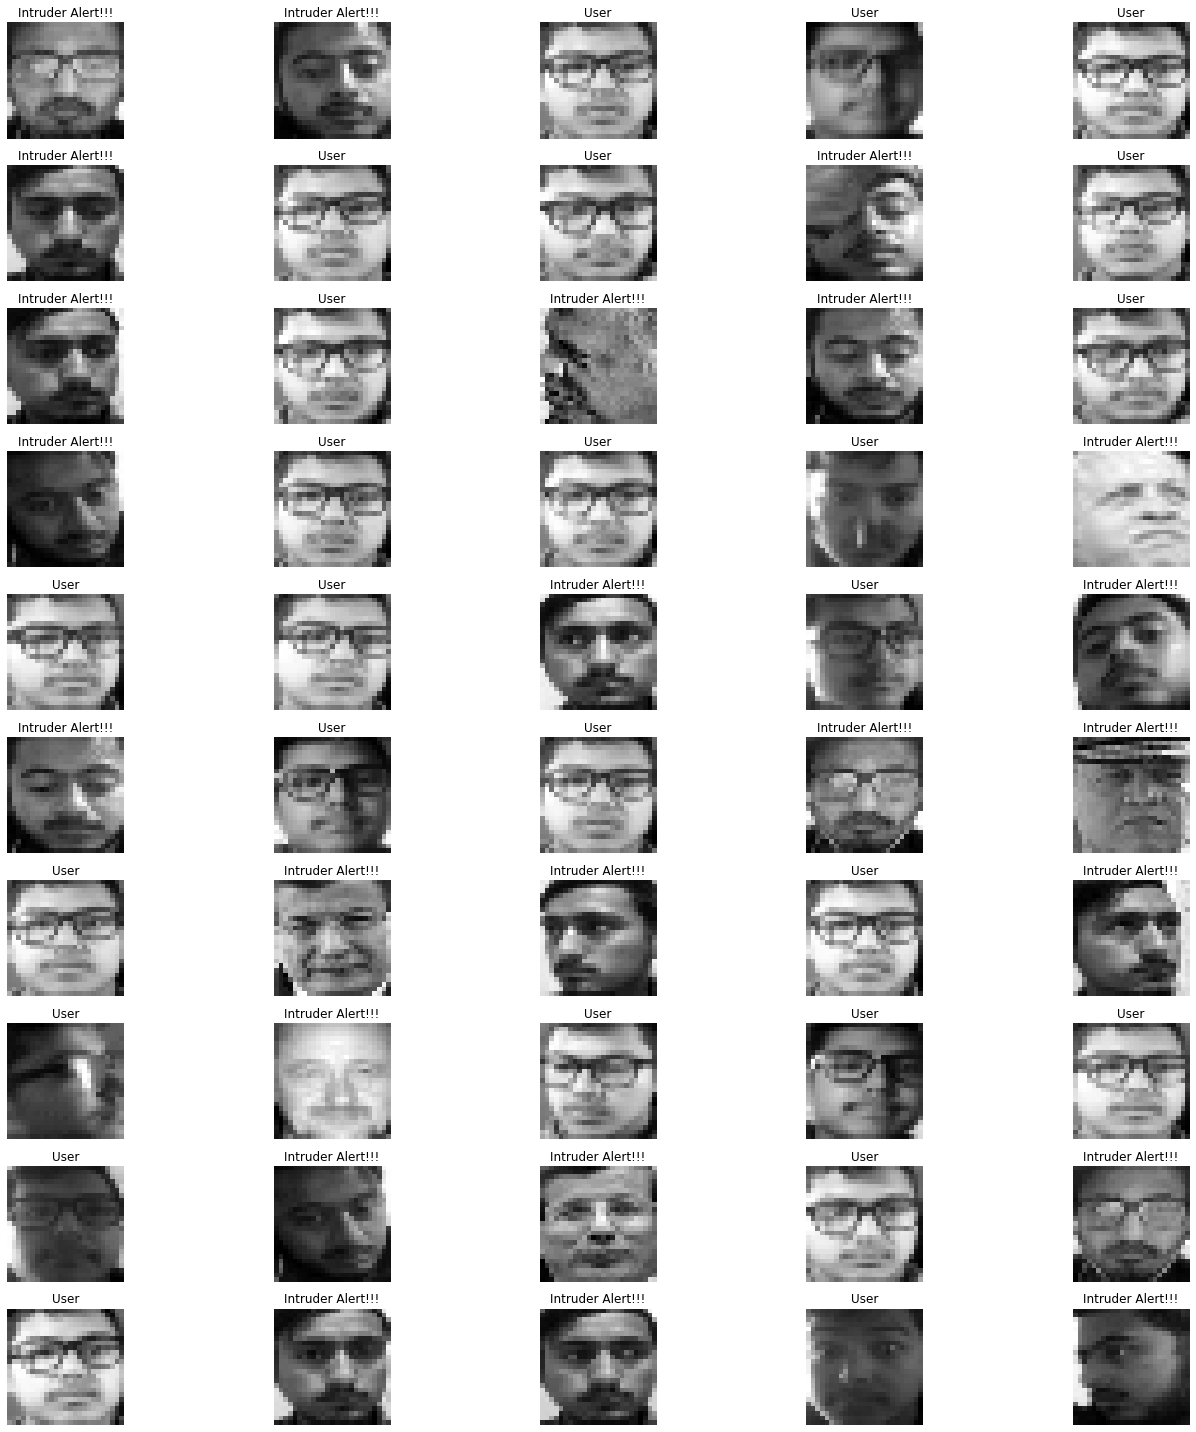

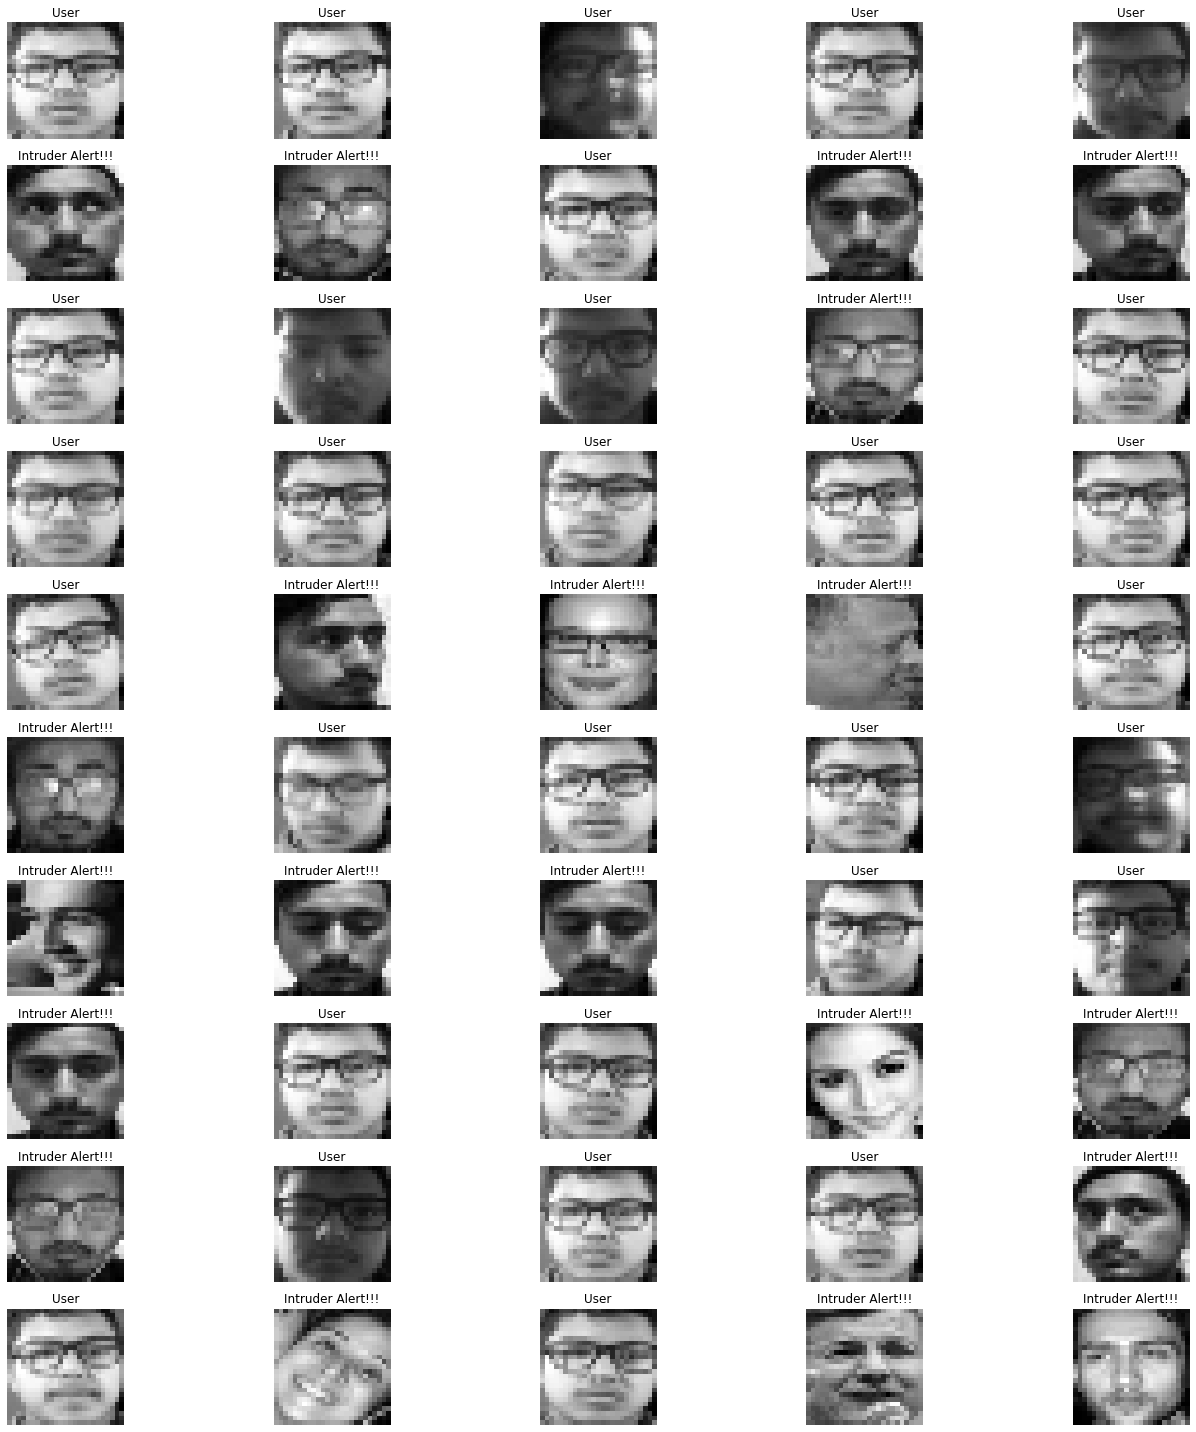

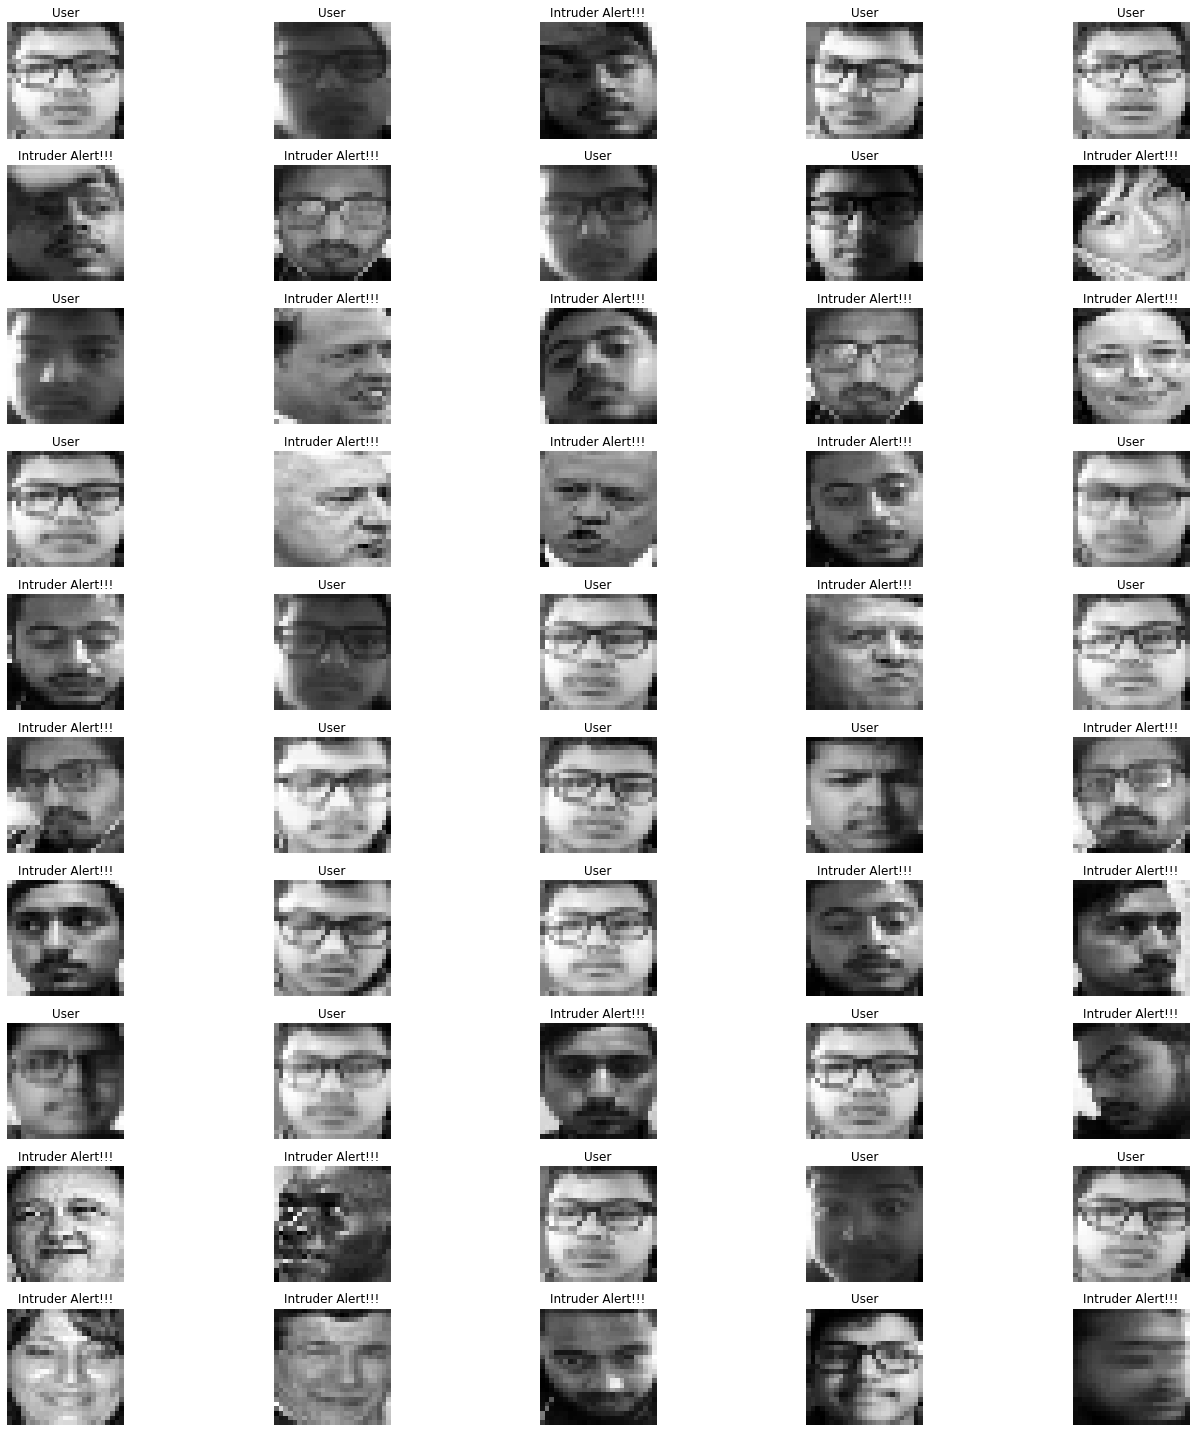

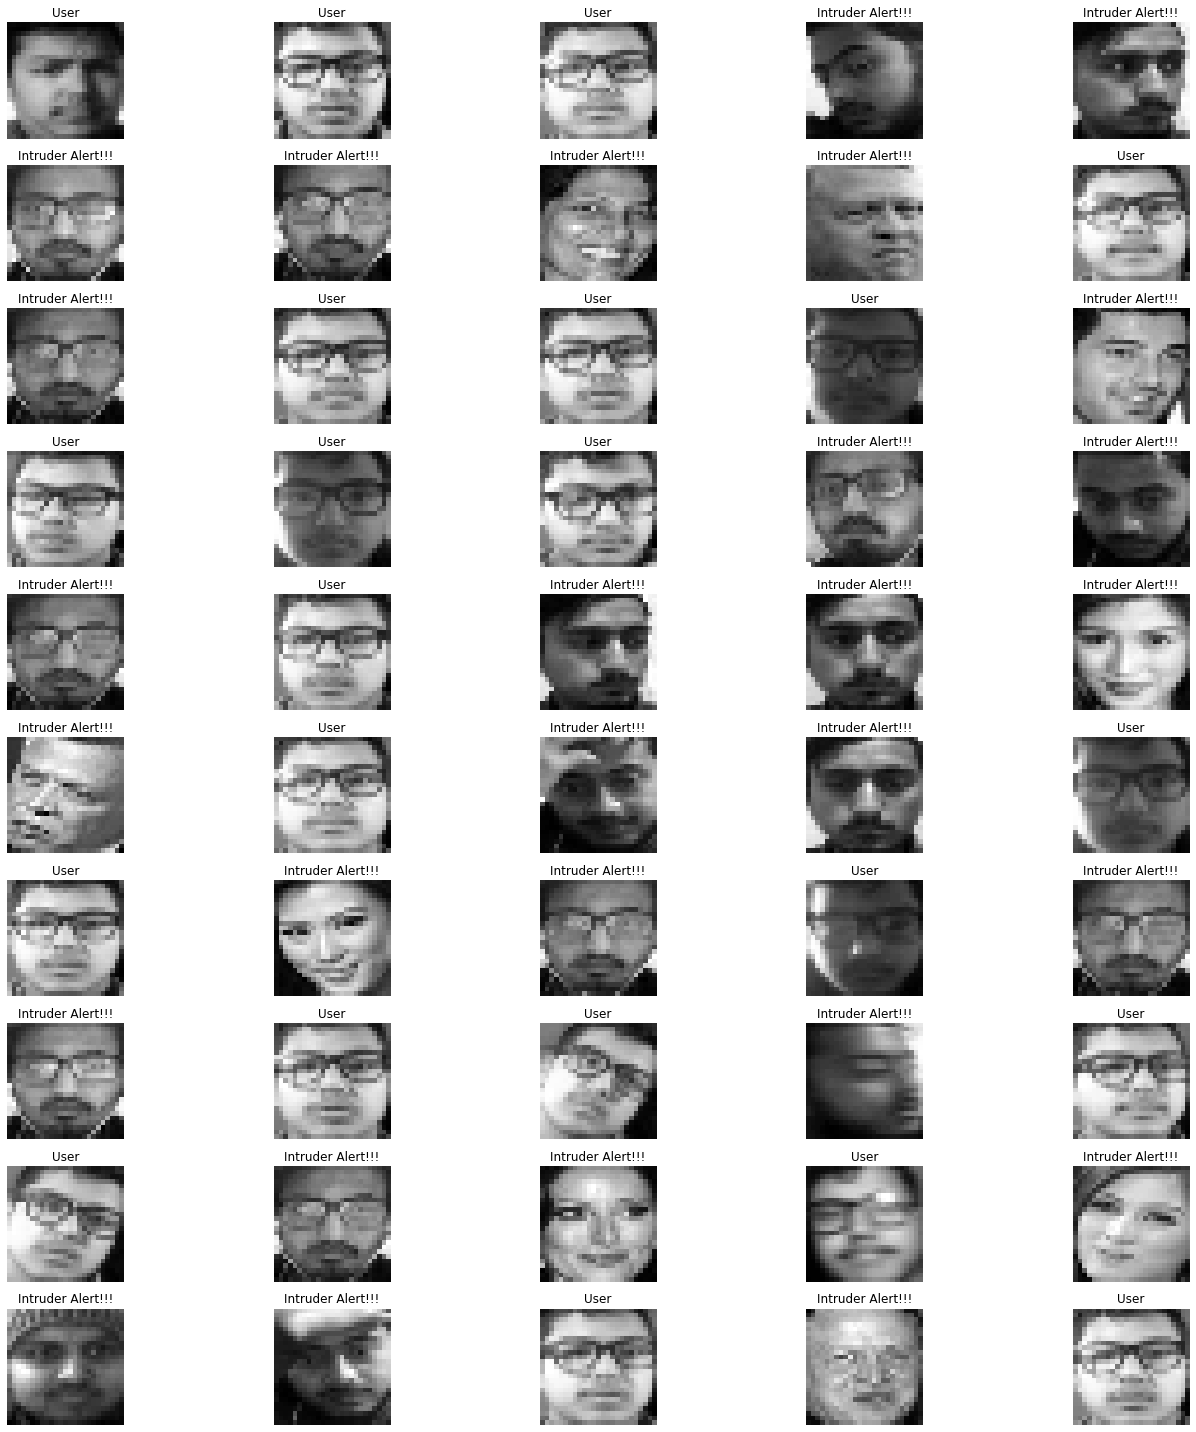

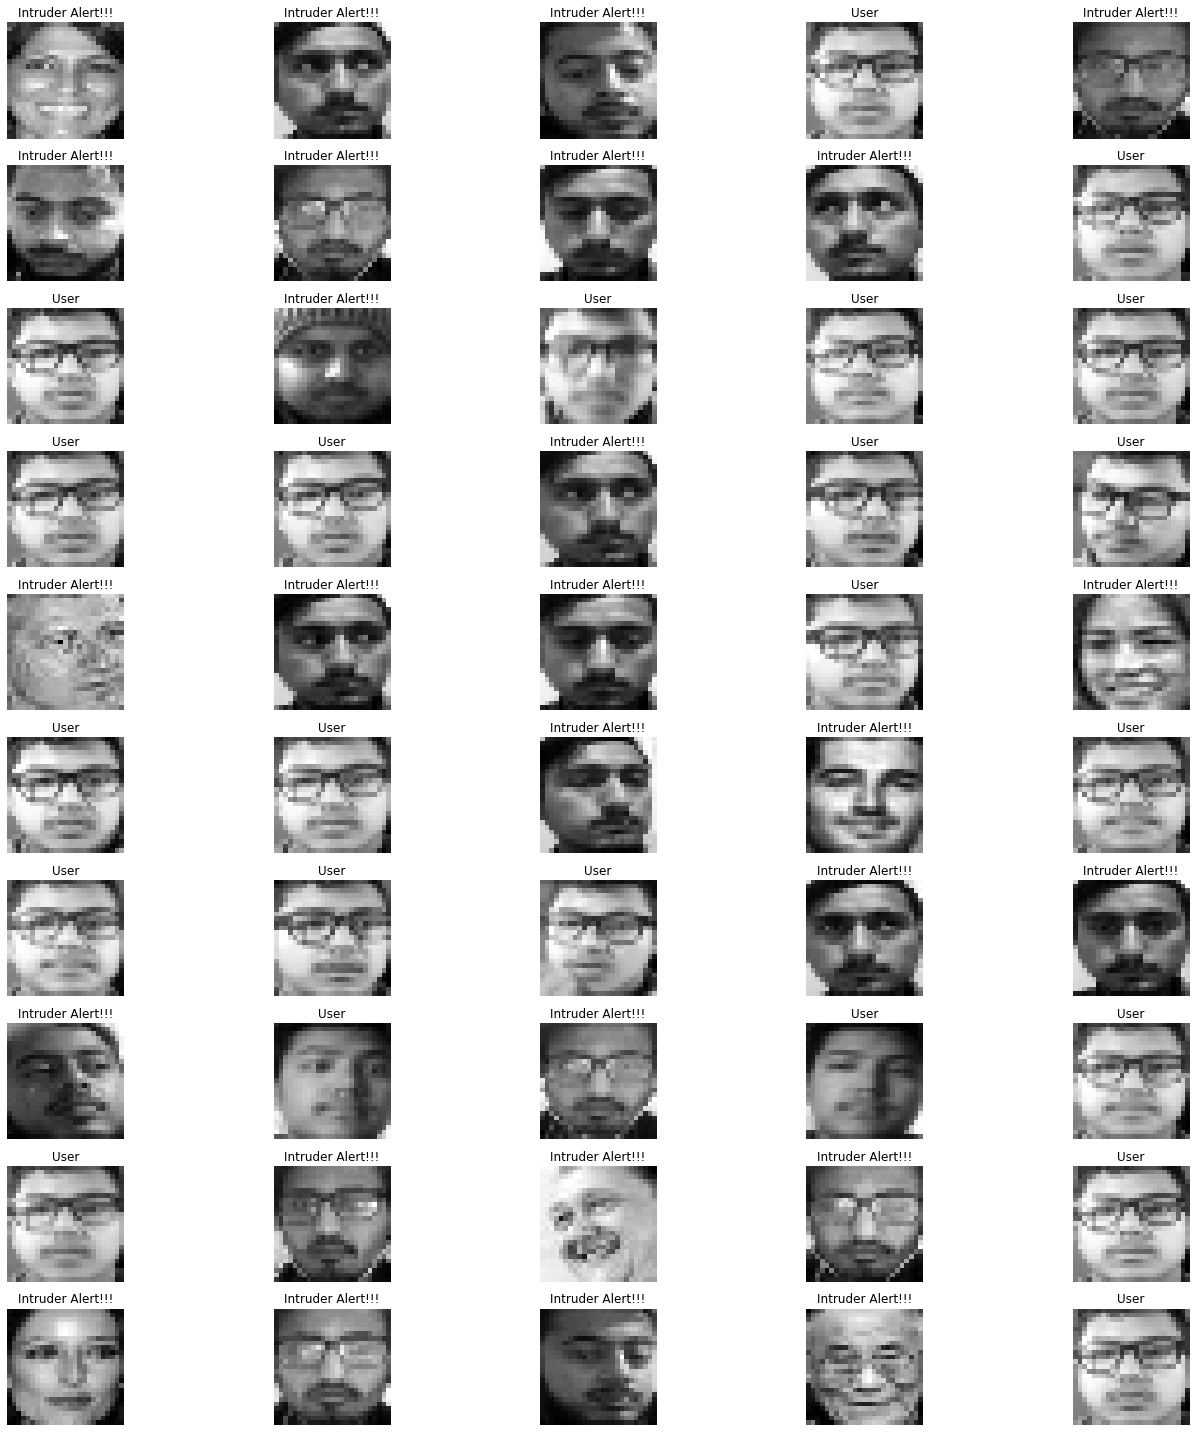

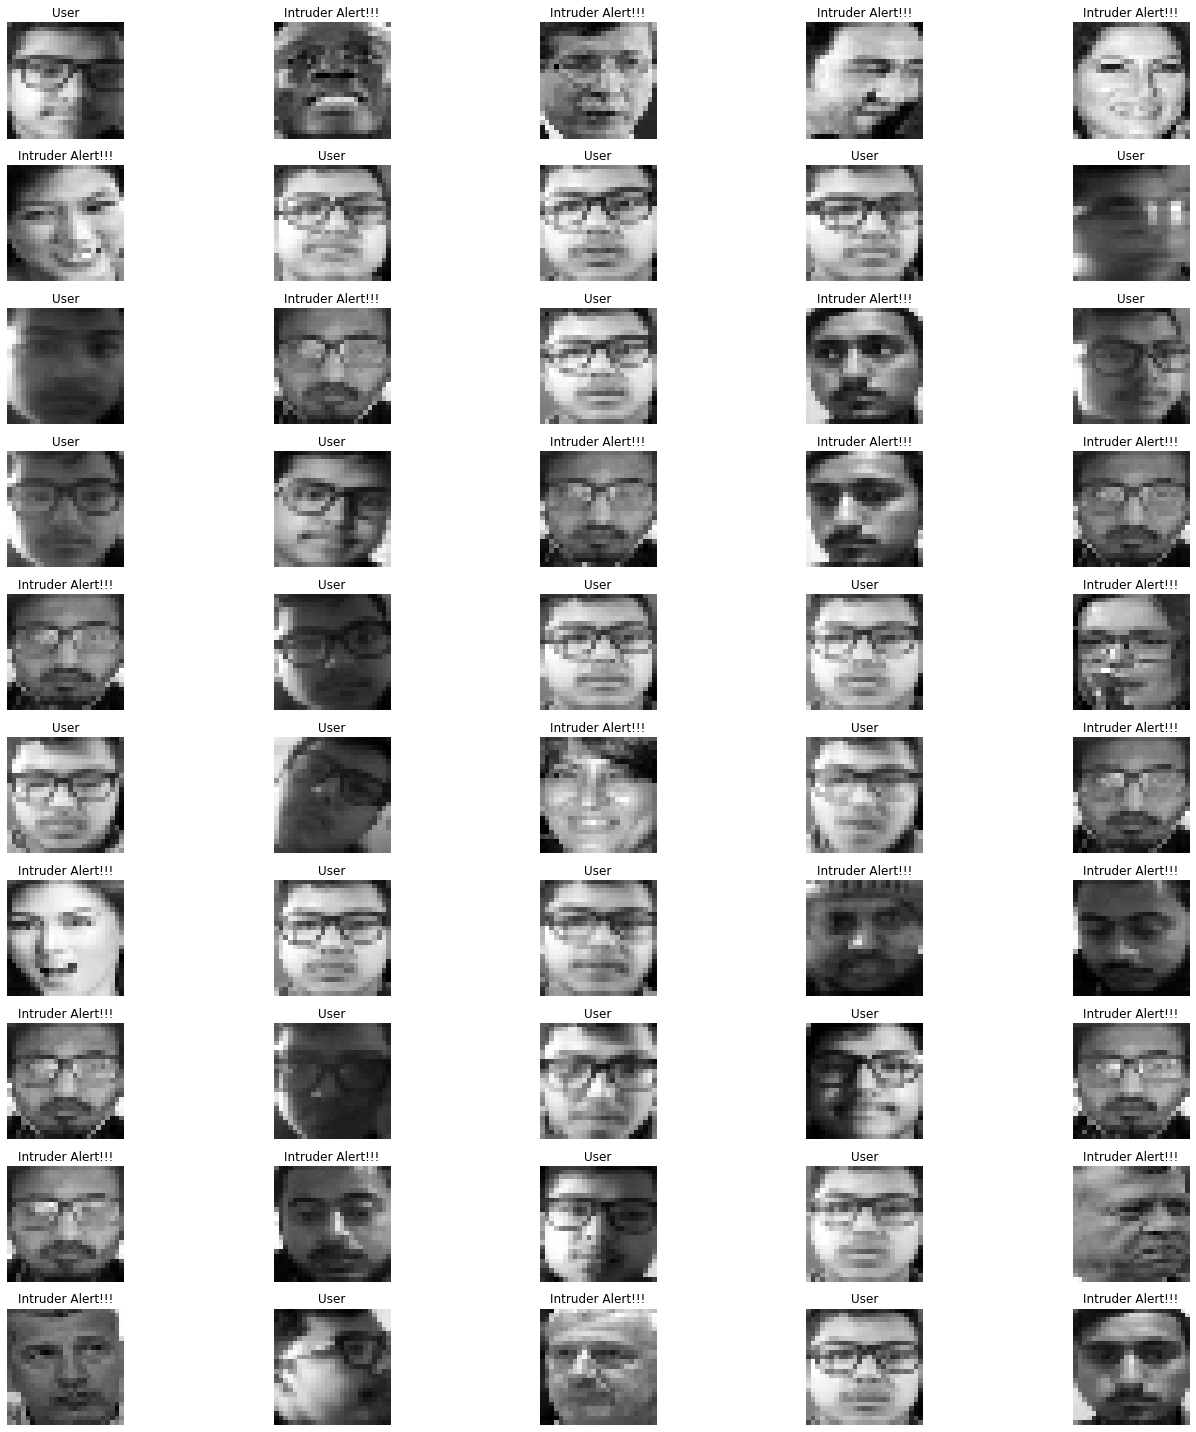

In [230]:
for i in range(0,len(testX)//3,50):
    plotTestImages(testX[i:i+50],testY[i:i+50])

In [8]:
see_file = "new_video.avi"
# see_file = "prajwol.avi"
def SeeVideo():
    cap = cv2.VideoCapture(0)
    dims = get_dims(cap)
    video_type_cv2 = get_video_type(see_file)

    out = cv2.VideoWriter(see_file,video_type_cv2,frame_rate,dims)
    startTime = time.perf_counter()
    endTime = startTime+2
    while time.perf_counter()<endTime:
        #Capture framy by frame
        ret,frame = cap.read()
        out.write(frame)
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) &0xFF==ord('x'):
            break

    cap.release()
    out.release()
    cv2.destroyAllWindows()
    
    vidObj = cv2.VideoCapture(see_file)

    count=0

def GetFramesFromVideo(filename):
    vidObj = cv2.VideoCapture(filename)

    count=0
    success =1
    while(success):
        success,image = vidObj.read()
        if success:
            cv2.imwrite("images\\current\\frames%d.jpg" %(count),image)
            count+=1
        else:
            break
def GetFacesFromImages():
    #taking the faces from the recorded data
    count=0
    for root,directory,files in os.walk("images\\current"):
        for file in files:
            if ".jpg" in file:
                if count < 16:
                    try:
                        filename = "images\\current\\"+file
                        pixels = extract_face_from_file(filename)
                        if pixels is None:
                            continue
                        resized = cv2.resize(pixels,(96,96))
                        np_resized = img_to_array(resized)
                        cv2.imwrite("images\\current_faces\\%d.jpg" %count,np_resized)

                        count+=1
                    except Exception as e:
                        print(e)
                        continue
                count+=1
                
    curr_photos = list()
    curr_photos.clear()
    count=0
    
    # put the faces in a list
    for root,directory,files in os.walk("images\\current_faces"):
        for file in files:
            if ".jpg" in file:
                try:
                    filename = "images\\current_faces\\"+file
                    photo = cv2.imread(filename)
                    photo = cv2.resize(photo,(25,25))
                    photo = cv2.cvtColor(photo,cv2.COLOR_BGR2GRAY)
                    photo = np.expand_dims(photo,axis=0)

                    curr_photos.append(photo)

                    count+=1
                except Exception as e:
                    continue
    return curr_photos
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = pyplot.subplots(10, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img2 = img.reshape((25,25))
        ax.imshow(img2,pyplot.cm.gray)
        title= "Intruder Alert!!!"
        if (model.predict_classes(np.expand_dims(img,axis=0))[0]):
            title= "User"
        ax.set_title(title)
        ax.axis('off')
    pyplot.tight_layout()
    pyplot.show()

def predictPerson(images_arr):
    total = len(images_arr)
    positiveCount =0
    for img in images_arr:
        if (model.predict_classes(np.expand_dims(img,axis=0))[0]):
            positiveCount+=1
    
    return positiveCount/total

In [20]:
SeeVideo()

In [21]:
GetFramesFromVideo(see_file)

error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [4]:
curr_photos = GetFacesFromImages()

NameError: name 'GetFacesFromImages' is not defined

In [3]:

if(len(curr_photos)>0):
    curr_photos = np.array(curr_photos)
    curr_photos = curr_photos.reshape((len(curr_photos),25,25,1))
    curr_photos = np.array(curr_photos,dtype="float")/255.0
    avg = 0 
    for i in range(0,len(curr_photos),50):
        avg = plotImages(curr_photos[i:i+50])
    if(avg<0.75):
        

SyntaxError: 'continue' not properly in loop (<ipython-input-3-0035feb21468>, line 12)

In [28]:
s = sched.scheduler(time.time, time.sleep)
def start_monitoring(sc): 
    print("Monitoring")
    SeeVideo()
    print("Video seen")
    GetFramesFromVideo(see_file)
    print("Got frames")
    curr_photos = GetFacesFromImages()
    print("Got faces")
    if(len(curr_photos)>0):
        curr_photos = np.array(curr_photos)
        curr_photos = curr_photos.reshape((len(curr_photos),25,25,1))
        curr_photos = np.array(curr_photos,dtype="float")/255.0
        if(predictPerson(curr_photos)<0.75):
            print("Intruder Detected")
            os.system("shutdown /s /t 0")
        else:
            print("User Detected")

    # do your stuff
    s.enter(30, 1, start_monitoring, (sc,))

s.enter(30, 1, start_monitoring, (s,))
s.run()

Monitoring
Video seen
Got frames
Got faces
User Detected
Monitoring
Video seen
Got frames
Got faces
Intruder Detected
Monitoring
Video seen
Got frames
Got faces
Intruder Detected


KeyboardInterrupt: 